# Prediction Results

In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
boxes1 = {
    0: [120,205,30,60],
    1: [205,290,30,60],
    2: [120,205,0,30],
    3: [205,290,0,30],
    4: [120,205,-30,0],
    5: [205,290,-30,0],
    6: [120,205,-60,-30],
    7: [205,290,-60,-30]
}
# New dictionary to hold 16 sub-boxes
boxes2 = {}

# Counter for keys in boxes2
new_key = 0

# Iteratively split each box into two
for key, (lon_min, lon_max, lat_min, lat_max) in boxes1.items():
    # Calculate the longitude midpoint
    lon_mid = (lon_min + lon_max) / 2
    
    # Define two new sub-boxes by splitting along the longitude midpoint
    boxes2[new_key] = [lon_min, lon_mid, lat_min, lat_max]
    new_key += 1
    boxes2[new_key] = [lon_mid, lon_max, lat_min, lat_max]
    new_key += 1

def plot_grid_count(df):
    # Create a figure and axis
    grid_counts = df['box'].value_counts()
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())

    # Set map extent
    ax.set_extent([120, 290, -60, 60], crs=ccrs.PlateCarree())

    # Add land and coastlines
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)

    # Plot the boxes and their counts
    for grid, count in grid_counts.items():
        if grid in boxes1.values():
            min_lon, max_lon, min_lat, max_lat = grid
            
            ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon],
                    [min_lat, min_lat, max_lat, max_lat, min_lat],
                    color='black', linewidth=1, transform=ccrs.PlateCarree())
            ax.text((min_lon + max_lon) / 2, (min_lat + max_lat) / 2,
                    str(count),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ccrs.PlateCarree(), color="r")
            

    ax2.set_extent([120, 290, -60, 60], crs=ccrs.PlateCarree())

    # Add land and coastlines
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)

    # Plot the boxes and their counts
    for grid, count in grid_counts.items():
        if grid in boxes2.values():
            min_lon, max_lon, min_lat, max_lat = grid
            
            ax2.plot([min_lon, max_lon, max_lon, min_lon, min_lon],
                    [min_lat, min_lat, max_lat, max_lat, min_lat],
                    color='black', linewidth=1, transform=ccrs.PlateCarree())
            ax2.text((min_lon + max_lon) / 2, (min_lat + max_lat) / 2,
                    str(count),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ccrs.PlateCarree(), color="r")

    plt.show()

In [3]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())


folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from PredictorsDrivers import (
    PCAPredictors
)
from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)

## California

In [5]:
region = "california"
FREQUENCY= "2monthly"
metadata_sst = pd.read_csv(f"data/new_features/{region}/metadata.csv")
metadata_t2m = pd.read_csv(f"data/new_features_t2m/{region}/metadata.csv")
metadata = pd.concat((metadata_sst,metadata_t2m))
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

id_data                       filename  boxes  top_n  var_thresh   
0     0711afc4     predictor_0711afc4.parquet      0      5         NaN  \
1     193414ce     predictor_193414ce.parquet      0     10         NaN   
2     4e69fe46     predictor_4e69fe46.parquet      0     15         NaN   
3     6af23f2d     predictor_6af23f2d.parquet      0     20         NaN   
4     3405d1e5     predictor_3405d1e5.parquet      0     30         NaN   
...        ...                            ...    ...    ...         ...   
1495  f8698b6f   predictor_f8698b6f_8.parquet      0     30        0.15   
1496  f8698b6f   predictor_f8698b6f_9.parquet      0     30        0.15   
1497  f8698b6f  predictor_f8698b6f_10.parquet      0     30        0.15   
1498  f8698b6f  predictor_f8698b6f_11.parquet      0     30        0.15   
1499  f8698b6f  predictor_f8698b6f_12.parquet      0     30        0.15   

      modes frequency  season methods extra_indices  only_sea  
0         1    yearly       0      ps           NaN      True  
1         1    yearly       0      ps           NaN      True  
2         1    yearly       0      ps           NaN      True  
3         1    yearly       0      ps           NaN      True  
4         1    yearly       0      ps           NaN      True  
...     ...       ...     ...     ...           ...       ...  
1495      3  2monthly       8      ps   PDO-ONI-SAM     False  
1496      3  2monthly       9      ps   PDO-ONI-SAM     False  
1497      3  2monthly      10      ps   PDO-ONI-SAM     False  
1498      3  2monthly      11      ps   PDO-ONI-SAM     False  
1499      3  2monthly      12      ps   PDO-ONI-SAM     False  

[3000 rows x 11 columns]

In [6]:
results_sst = pd.read_csv(f"data/{region}_results/results_sst.csv")
results_t2m = pd.read_csv(f"data/{region}_results/results.csv")
results = pd.concat((results_sst,results_t2m))
results

model  season metric       stage       HWN       HWF       HWD   
0         Linear       1     r2  prediction  0.395260  0.194330  0.065000  \
1            RF5       1     r2  prediction  0.709978  0.516976  0.422246   
2           RF10       1     r2  prediction  0.589857  0.466469  0.348330   
3        SVR-rbf       1     r2  prediction  0.464256  0.168007  0.141788   
4          XGB10       1     r2  prediction  0.553628  0.325652  0.164967   
...          ...     ...    ...         ...       ...       ...       ...   
132355  CNNRNN16      10   mape        TSCV  1.231581  1.326076  1.633161   
132356   SLSTM16      11   mape        TSCV  2.205338  1.666974  1.521422   
132357  CNNRNN16      11   mape        TSCV  2.828306  2.722673  1.498427   
132358   SLSTM16      12   mape        TSCV  1.599472  3.441654  1.289745   
132359  CNNRNN16      12   mape        TSCV  2.764857  3.127386  2.496883   

             HWM       HWA   Average   id_data  
0       0.065778  0.042364  0.152546  ec28ad68  
1       0.437175  0.437733  0.504822  ec28ad68  
2       0.355255  0.292732  0.410529  ec28ad68  
3       0.343720  0.267298  0.277014  ec28ad68  
4       0.225673  0.205556  0.295095  ec28ad68  
...          ...       ...       ...       ...  
132355  0.995791  8.526972  2.742716  f8698b6f  
132356  1.163450  1.061463  1.523729  f8698b6f  
132357  1.096299  1.041968  1.837535  f8698b6f  
132358  1.827815  3.660854  2.363908  f8698b6f  
132359  2.264888  4.495609  3.029925  f8698b6f  

[207600 rows x 11 columns]

In [7]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")


In [8]:
summary_tscv_r2

model  season   id_data    index  best_value   
0    SLSTM16       7  d0b70da8  Average    0.869502  \
1    SLSTM16       1  134731c8  Average    0.866591   
2    SLSTM16       1  134731c8      HWA    0.907689   
3    SLSTM16       7  d0b70da8      HWA    0.855805   
4   CNNRNN16       7  f12d9b95      HWD    0.930413   
5    SLSTM16       7  d0b70da8      HWD    0.922919   
6   CNNRNN16       7  f12d9b95      HWF    0.924386   
7    SLSTM16       7  d0b70da8      HWF    0.903163   
8    SLSTM16       1  134731c8      HWM    0.898480   
9    SLSTM16       1  3026e6d4      HWM    0.849825   
10   SLSTM16       1  134731c8      HWN    0.928950   
11   SLSTM16       7  d0b70da8      HWN    0.875348   

                        filename  boxes  top_n  var_thresh  modes frequency   
0   predictor_d0b70da8_7.parquet      0     20        0.10      3  2monthly  \
1   predictor_134731c8_1.parquet      0     30        0.15      3  2monthly   
2   predictor_134731c8_1.parquet      0     30        0.15      3  2monthly   
3   predictor_d0b70da8_7.parquet      0     20        0.10      3  2monthly   
4   predictor_f12d9b95_7.parquet      0     30        0.10      3  2monthly   
5   predictor_d0b70da8_7.parquet      0     20        0.10      3  2monthly   
6   predictor_f12d9b95_7.parquet      0     30        0.10      3  2monthly   
7   predictor_d0b70da8_7.parquet      0     20        0.10      3  2monthly   
8   predictor_134731c8_1.parquet      0     30        0.15      3  2monthly   
9   predictor_3026e6d4_1.parquet      0     30         NaN      3  2monthly   
10  predictor_134731c8_1.parquet      0     30        0.15      3  2monthly   
11  predictor_d0b70da8_7.parquet      0     20        0.10      3  2monthly   

   methods extra_indices  only_sea  
0       ps   PDO-ONI-SAM      True  
1       ps           NaN      True  
2       ps           NaN      True  
3       ps   PDO-ONI-SAM      True  
4       ps   PDO-ONI-SAM     False  
5       ps   PDO-ONI-SAM      True  
6       ps   PDO-ONI-SAM     False  
7       ps   PDO-ONI-SAM      True  
8       ps           NaN      True  
9       ps   PDO-ONI-SAM      True  
10      ps           NaN      True  
11      ps   PDO-ONI-SAM      True

Now we repite for each season

In [9]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [10]:
display_full(tscv_r2_seasons)

model    index  best_value   id_data                       filename   
0   SLSTM16  Average    0.866591  134731c8   predictor_134731c8_1.parquet  \
1   SLSTM16      HWA    0.907689  134731c8   predictor_134731c8_1.parquet   
2   SLSTM16      HWD    0.772449  3026e6d4   predictor_3026e6d4_1.parquet   
3   SLSTM16      HWF    0.852822  134731c8   predictor_134731c8_1.parquet   
4   SLSTM16      HWM    0.898480  134731c8   predictor_134731c8_1.parquet   
5   SLSTM16      HWN    0.928950  134731c8   predictor_134731c8_1.parquet   
0   SLSTM16  Average    0.632618  f1e19ccf   predictor_f1e19ccf_2.parquet   
1   SLSTM16      HWA    0.720434  f1e19ccf   predictor_f1e19ccf_2.parquet   
2   SLSTM16      HWD    0.590015  f1e19ccf   predictor_f1e19ccf_2.parquet   
3   SLSTM16      HWF    0.539353  38af6be5   predictor_38af6be5_2.parquet   
4   SLSTM16      HWM    0.653638  f1e19ccf   predictor_f1e19ccf_2.parquet   
5   SLSTM16      HWN    0.662834  f1e19ccf   predictor_f1e19ccf_2.parquet   
0  CNNRNN16  Average    0.589012  4ccfcb80   predictor_4ccfcb80_3.parquet   
1  CNNRNN16      HWA    0.710067  4ccfcb80   predictor_4ccfcb80_3.parquet   
2  CNNRNN16      HWD    0.767790  369f50ac   predictor_369f50ac_3.parquet   
3   SLSTM16      HWF    0.668681  0c63f5a6   predictor_0c63f5a6_3.parquet   
4  CNNRNN16      HWM    0.666412  4ccfcb80   predictor_4ccfcb80_3.parquet   
5  CNNRNN16      HWN    0.651407  2f5a1945   predictor_2f5a1945_3.parquet   
0  CNNRNN16  Average    0.444350  141689a6   predictor_141689a6_4.parquet   
1   SLSTM16      HWA    0.517514  c7dd2321   predictor_c7dd2321_4.parquet   
2   SLSTM16      HWD    0.377467  c7dd2321   predictor_c7dd2321_4.parquet   
3  CNNRNN16      HWF    0.470486  141689a6   predictor_141689a6_4.parquet   
4   SLSTM16      HWM    0.479673  134731c8   predictor_134731c8_4.parquet   
5  CNNRNN16      HWN    0.488250  141689a6   predictor_141689a6_4.parquet   
0  CNNRNN16  Average    0.640794  d0b70da8   predictor_d0b70da8_5.parquet   
1  CNNRNN16      HWA    0.649591  d80346f0   predictor_d80346f0_5.parquet   
2  CNNRNN16      HWD    0.755254  d0b70da8   predictor_d0b70da8_5.parquet   
3  CNNRNN16      HWF    0.716481  d0b70da8   predictor_d0b70da8_5.parquet   
4  CNNRNN16      HWM    0.607335  63b4591b   predictor_63b4591b_5.parquet   
5  CNNRNN16      HWN    0.762540  d0b70da8   predictor_d0b70da8_5.parquet   
0  CNNRNN16  Average    0.811530  8476ed61   predictor_8476ed61_6.parquet   
1  CNNRNN16      HWA    0.750384  8476ed61   predictor_8476ed61_6.parquet   
2  CNNRNN16      HWD    0.856997  8476ed61   predictor_8476ed61_6.parquet   
3  CNNRNN16      HWF    0.887310  8476ed61   predictor_8476ed61_6.parquet   
4  CNNRNN16      HWM    0.714222  dcddde06   predictor_dcddde06_6.parquet   
5  CNNRNN16      HWN    0.863145  8476ed61   predictor_8476ed61_6.parquet   
0   SLSTM16  Average    0.869502  d0b70da8   predictor_d0b70da8_7.parquet   
1   SLSTM16      HWA    0.855805  d0b70da8   predictor_d0b70da8_7.parquet   
2  CNNRNN16      HWD    0.930413  f12d9b95   predictor_f12d9b95_7.parquet   
3  CNNRNN16      HWF    0.924386  f12d9b95   predictor_f12d9b95_7.parquet   
4  CNNRNN16      HWM    0.829974  31df530c   predictor_31df530c_7.parquet   
5   SLSTM16      HWN    0.875348  d0b70da8   predictor_d0b70da8_7.parquet   
0  CNNRNN16  Average    0.712609  a6a3b0e8   predictor_a6a3b0e8_8.parquet   
1   SLSTM16      HWA    0.783434  d38dad7b   predictor_d38dad7b_8.parquet   
2  CNNRNN16      HWD    0.682172  e299ecb9   predictor_e299ecb9_8.parquet   
3   SLSTM16      HWF    0.812544  5cb46bcc   predictor_5cb46bcc_8.parquet   
4   SLSTM16      HWM    0.815897  d38dad7b   predictor_d38dad7b_8.parquet   
5   SLSTM16      HWN    0.694123  a6a3b0e8   predictor_a6a3b0e8_8.parquet   
0   SLSTM16  Average    0.705785  31df530c   predictor_31df530c_9.parquet   
1   SLSTM16      HWA    0.671972  3cdfe575   predictor_3cdfe575_9.parquet   
2   SLSTM16      HWD    0.832176  31df530c   predictor_31df530c_9.parquet   
3 

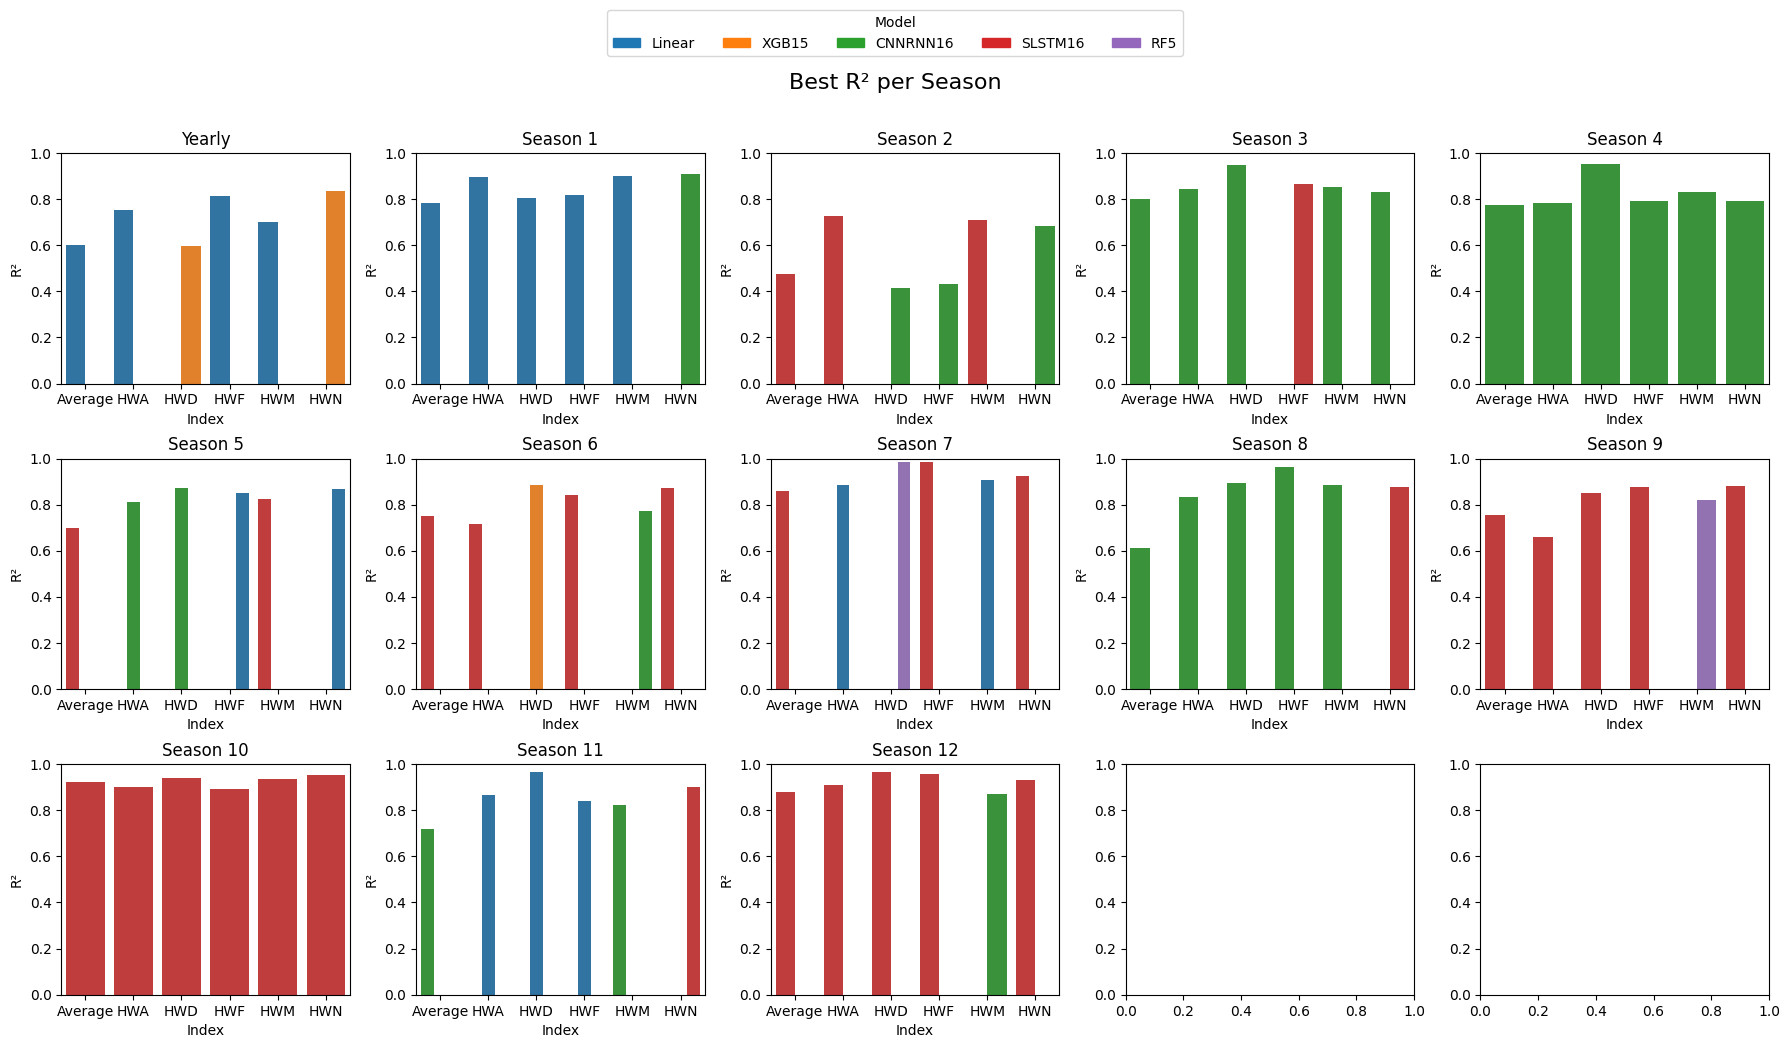

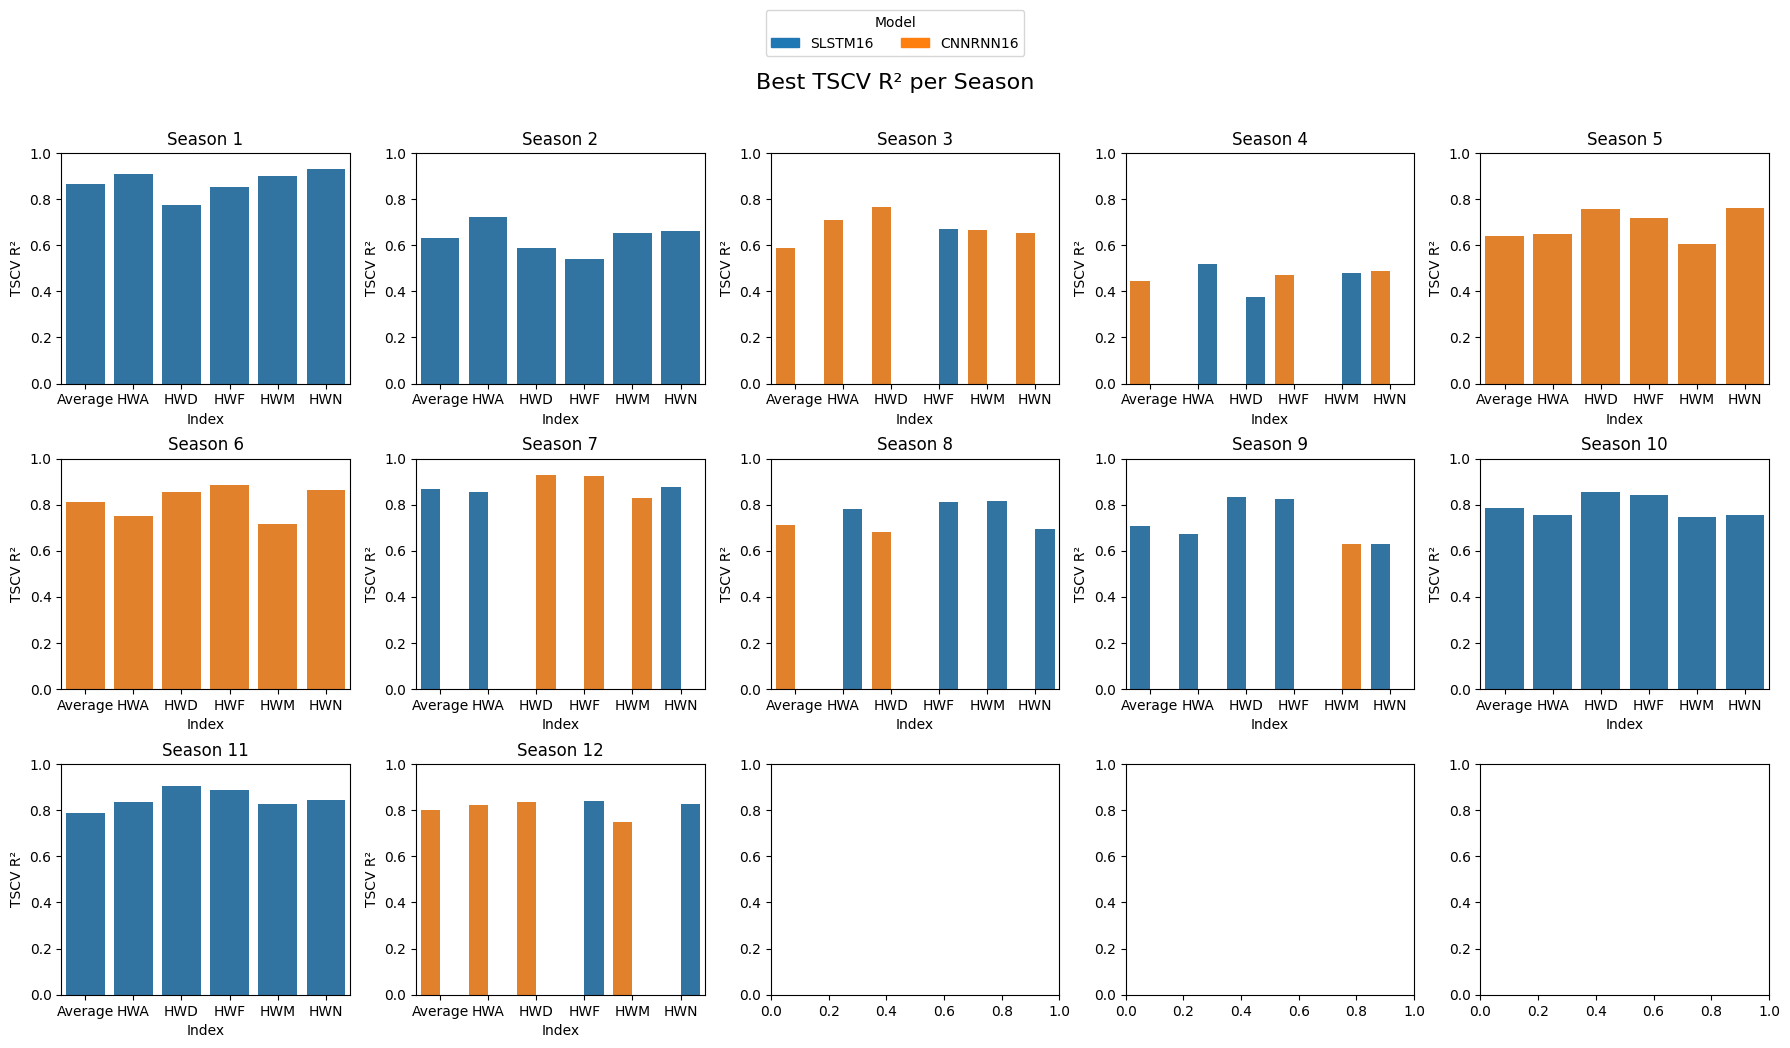

<Figure size 1800x1000 with 0 Axes>

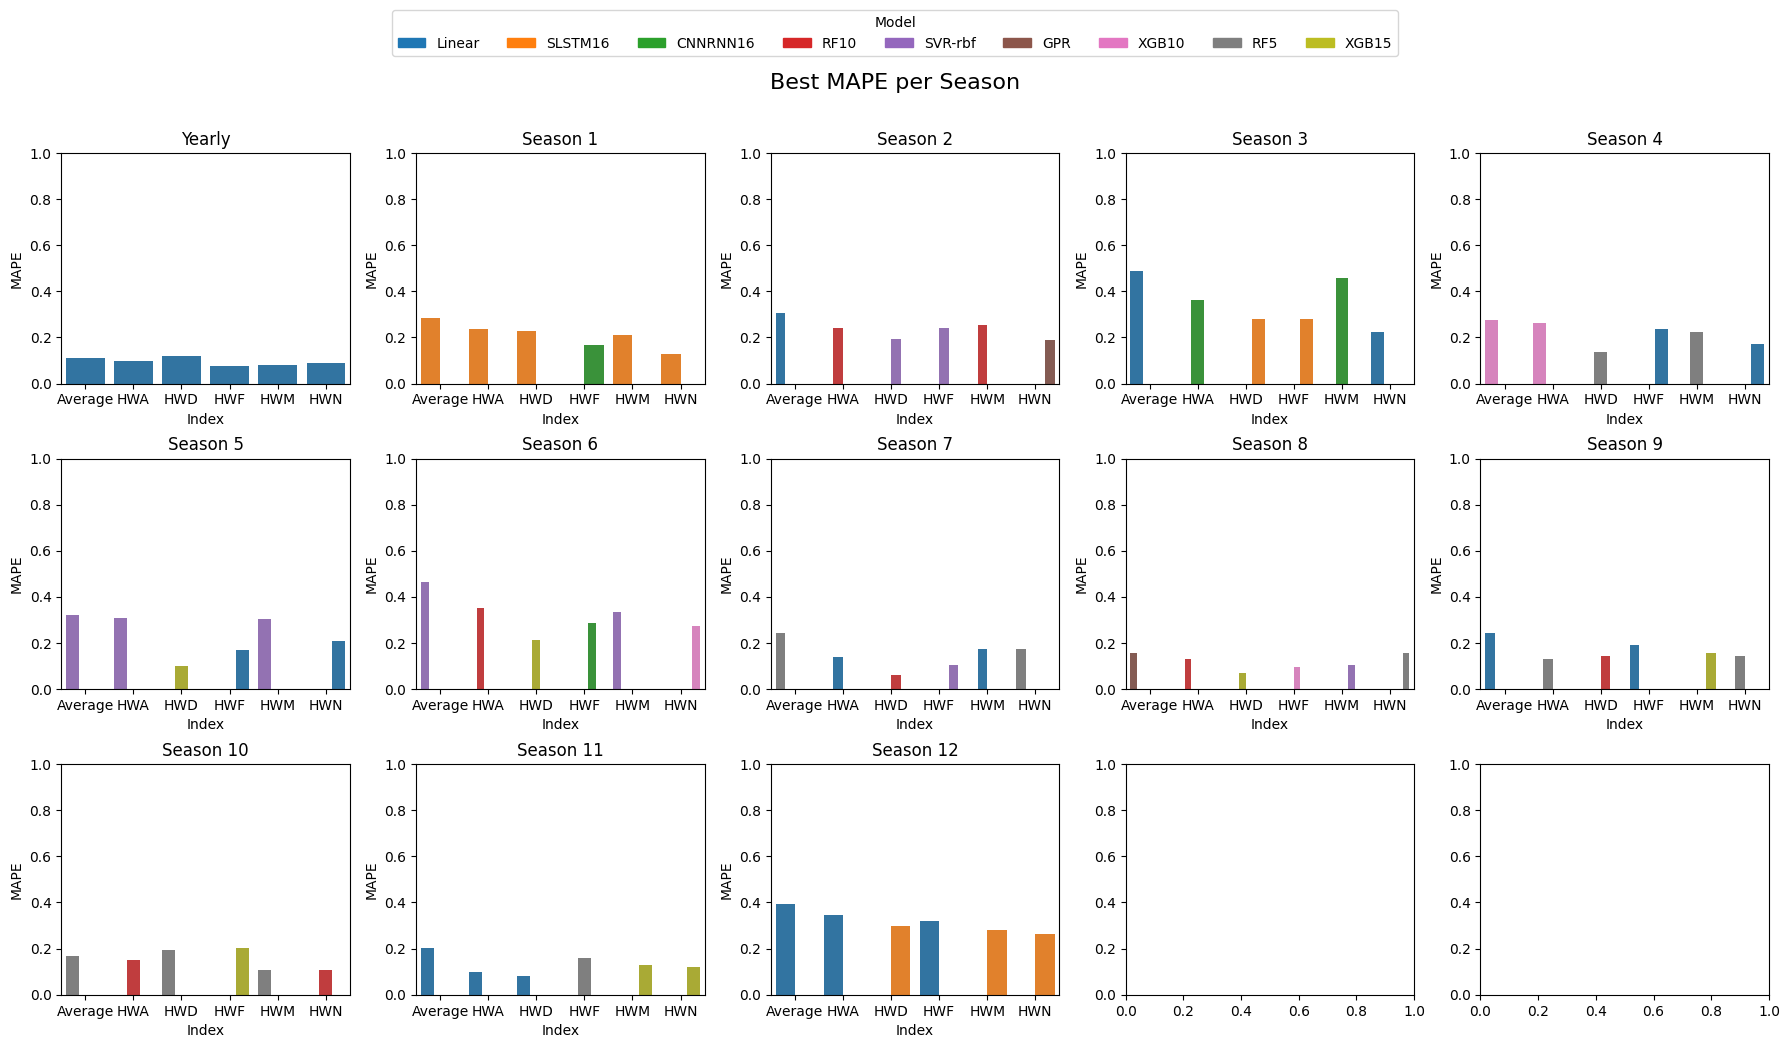

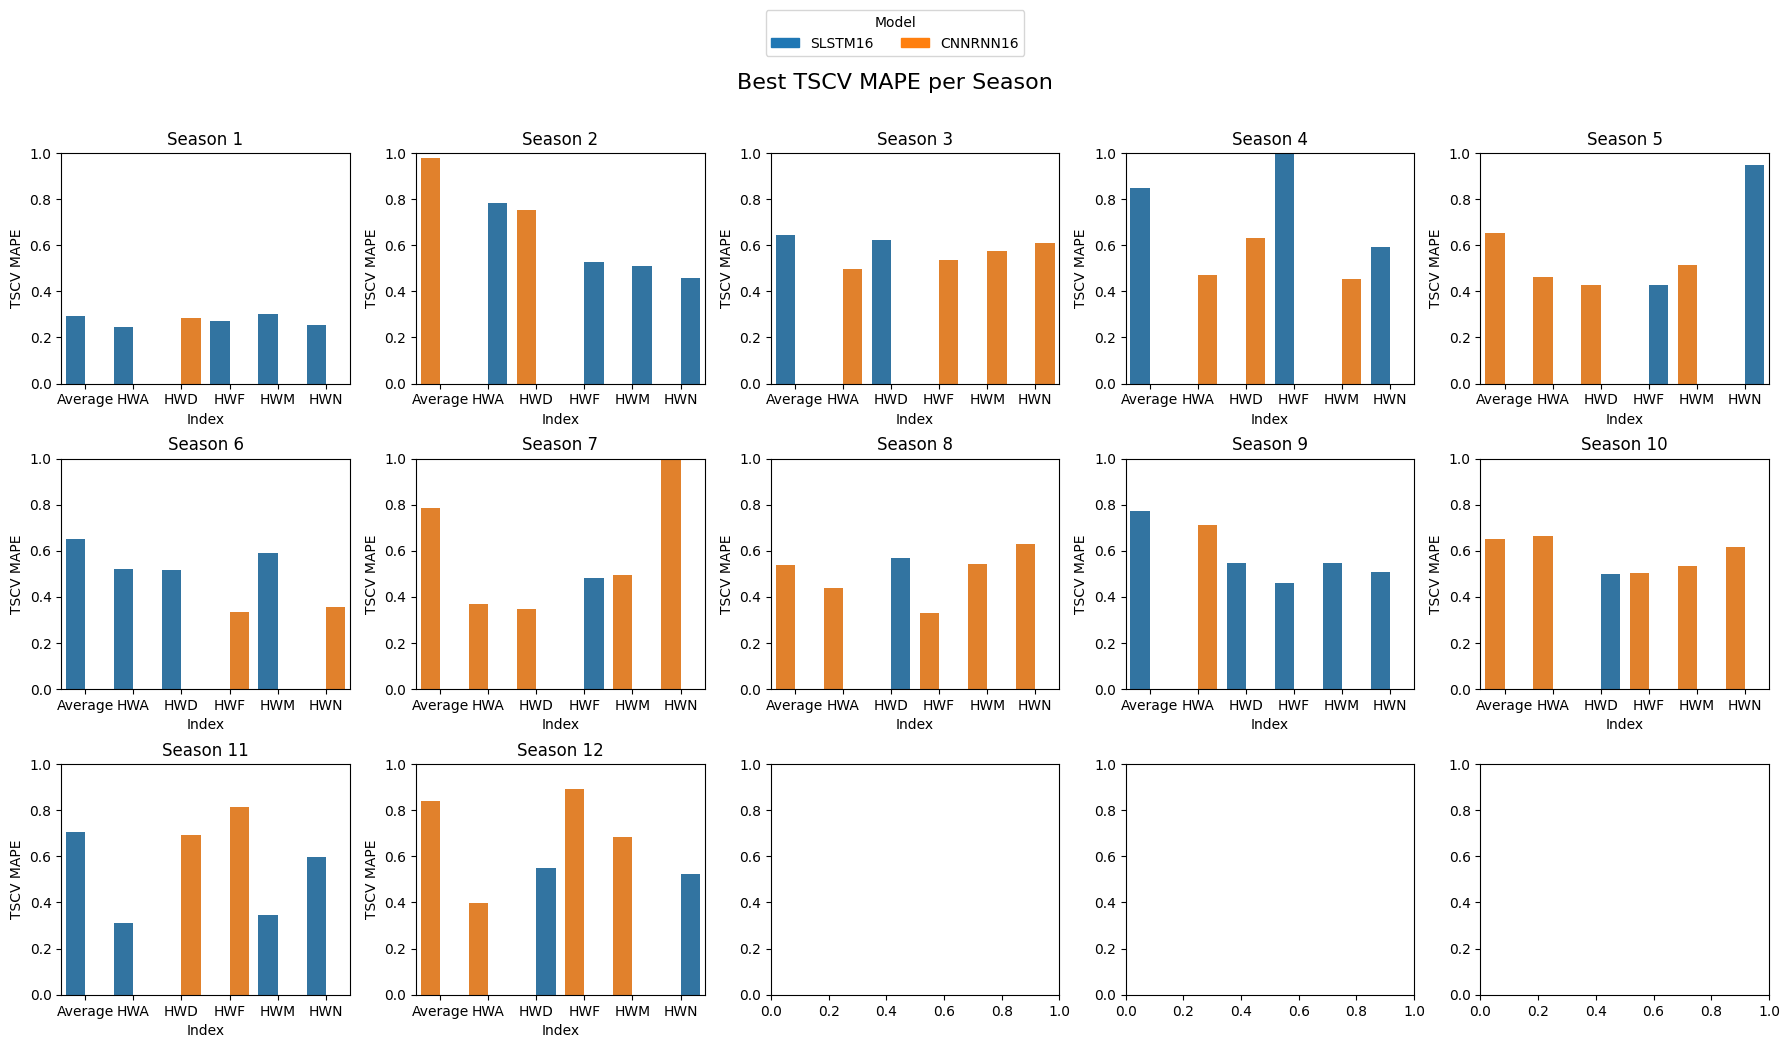

In [11]:
# Plot R2 results
plot_best_results_per_season(r2_seasons, "R²", "prediction", "Best R² per Season")

# Plot CV R2 results
plot_best_results_per_season(tscv_r2_seasons, "TSCV R²", "TSCV","Best TSCV R² per Season")

# Plot MAPE results (invert y-axis since lower is better)
plt.figure(figsize=(18, 10))
plot_best_results_per_season(mape_seasons, "MAPE", "prediction", "Best MAPE per Season")
plot_best_results_per_season(tscv_mape_seasons, "TSCV MAPE", "TSCV", "Best TSCV MAPE per Season")


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_mape_seasons.sort_values("best_value", ascending=True))

model    index  best_value   id_data                       filename   
1   SLSTM16      HWA    0.246778  134731c8   predictor_134731c8_1.parquet  \
5   SLSTM16      HWN    0.252352  134731c8   predictor_134731c8_1.parquet   
3   SLSTM16      HWF    0.270073  f12d9b95   predictor_f12d9b95_1.parquet   
2  CNNRNN16      HWD    0.284745  c7dd2321   predictor_c7dd2321_1.parquet   
0   SLSTM16  Average    0.292090  f12d9b95   predictor_f12d9b95_1.parquet   
4   SLSTM16      HWM    0.302843  f12d9b95   predictor_f12d9b95_1.parquet   
1   SLSTM16      HWA    0.312489  6323caaa  predictor_6323caaa_11.parquet   
3  CNNRNN16      HWF    0.330207  e299ecb9   predictor_e299ecb9_8.parquet   
3  CNNRNN16      HWF    0.334348  8476ed61   predictor_8476ed61_6.parquet   
4   SLSTM16      HWM    0.345909  6323caaa  predictor_6323caaa_11.parquet   
2  CNNRNN16      HWD    0.347267  f8698b6f   predictor_f8698b6f_7.parquet   
5  CNNRNN16      HWN    0.357511  8476ed61   predictor_8476ed61_6.parquet   
1  CNNRNN16      HWA    0.369441  31df530c   predictor_31df530c_7.parquet   
1  CNNRNN16      HWA    0.396108  f1e19ccf  predictor_f1e19ccf_12.parquet   
3   SLSTM16      HWF    0.425495  36048593   predictor_36048593_5.parquet   
2  CNNRNN16      HWD    0.429587  d80346f0   predictor_d80346f0_5.parquet   
1  CNNRNN16      HWA    0.437174  e299ecb9   predictor_e299ecb9_8.parquet   
4  CNNRNN16      HWM    0.455302  141689a6   predictor_141689a6_4.parquet   
5   SLSTM16      HWN    0.459252  f1e19ccf   predictor_f1e19ccf_2.parquet   
3   SLSTM16      HWF    0.461114  8c2565cc   predictor_8c2565cc_9.parquet   
1  CNNRNN16      HWA    0.462135  63b4591b   predictor_63b4591b_5.parquet   
1  CNNRNN16      HWA    0.469490  141689a6   predictor_141689a6_4.parquet   
3   SLSTM16      HWF    0.483578  2ee27267   predictor_2ee27267_7.parquet   
4  CNNRNN16      HWM    0.494715  895e7c53   predictor_895e7c53_7.parquet   
1  CNNRNN16      HWA    0.494830  4ccfcb80   predictor_4ccfcb80_3.parquet   
2   SLSTM16      HWD    0.497487  ce3212c2  predictor_ce3212c2_10.parquet   
3  CNNRNN16      HWF    0.501600  d80346f0  predictor_d80346f0_10.parquet   
5   SLSTM16      HWN    0.507077  2510e651   predictor_2510e651_9.parquet   
4   SLSTM16      HWM    0.507921  d80346f0   predictor_d80346f0_2.parquet   
4  CNNRNN16      HWM    0.512149  3026e6d4   predictor_3026e6d4_5.parquet   
2   SLSTM16      HWD    0.514809  f12d9b95   predictor_f12d9b95_6.parquet   
1   SLSTM16      HWA    0.519466  c6715001   predictor_c6715001_6.parquet   
5   SLSTM16      HWN    0.521699  c68f5613  predictor_c68f5613_12.parquet   
3   SLSTM16      HWF    0.525478  f1e19ccf   predictor_f1e19ccf_2.parquet   
3  CNNRNN16      HWF    0.534319  a931928c   predictor_a931928c_3.parquet   
4  CNNRNN16      HWM    0.534413  6c22360e  predictor_6c22360e_10.parquet   
0  CNNRNN16  Average    0.539241  e299ecb9   predictor_e299ecb9_8.parquet   
4  CNNRNN16      HWM    0.540791  e299ecb9   predictor_e299ecb9_8.parquet   
4   SLSTM16      HWM    0.545746  31df530c   predictor_31df530c_9.parquet   
2   SLSTM16      HWD    0.547001  31df530c   predictor_31df530c_9.parquet   
2   SLSTM16      HWD    0.548795  31df530c  predictor_31df530c_12.parquet   
2   SLSTM16      HWD    0.568338  5cb46bcc   predictor_5cb46bcc_8.parquet   
4  CNNRNN16      HWM    0.573898  2f5a1945   predictor_2f5a1945_3.parquet   
4   SLSTM16      HWM    0.590246  a931928c   predictor_a931928c_6.parquet   
5   SLSTM16      HWN    0.592000  ea245beb   predictor_ea245beb_4.parquet   
5   SLSTM16      HWN    0.596603  20e64d75  predictor_20e64d75_11.parquet   
5  CNNRNN16      HWN    0.611347  c3da4202   predictor_c3da4202_3.parquet   
5  CNNRNN16      HWN    0.617120  d80346f0  predictor_d80346f0_10.parquet   
2   SLSTM16      HWD    0.620799  13d4975d   predictor_13d4975d_3.parquet   
5  CNNRNN16      HWN    0.627884  a6a3b0e8   predictor_a6a3b0e8_8.parquet   
2  CNNRNN16      HWD    0.631801  141689a6   predictor_141689a6_4.parquet   
0 

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


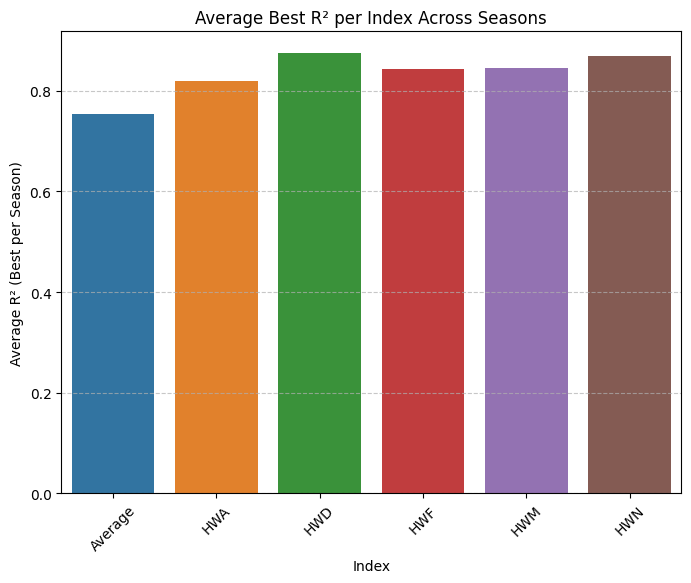

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


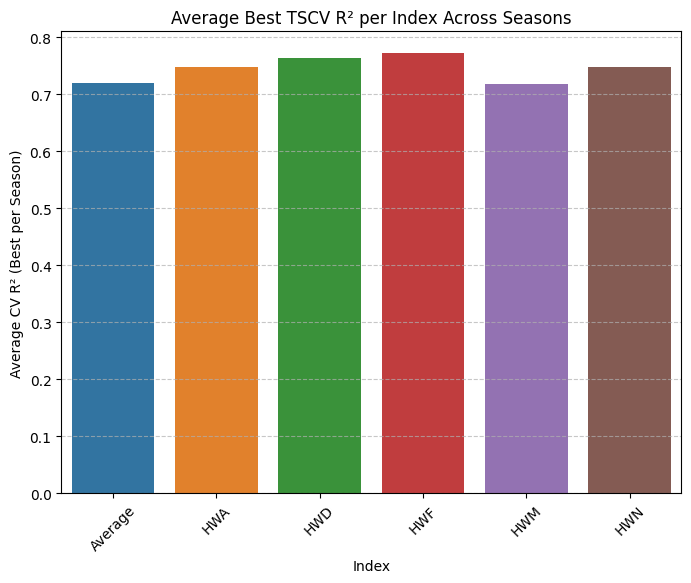

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


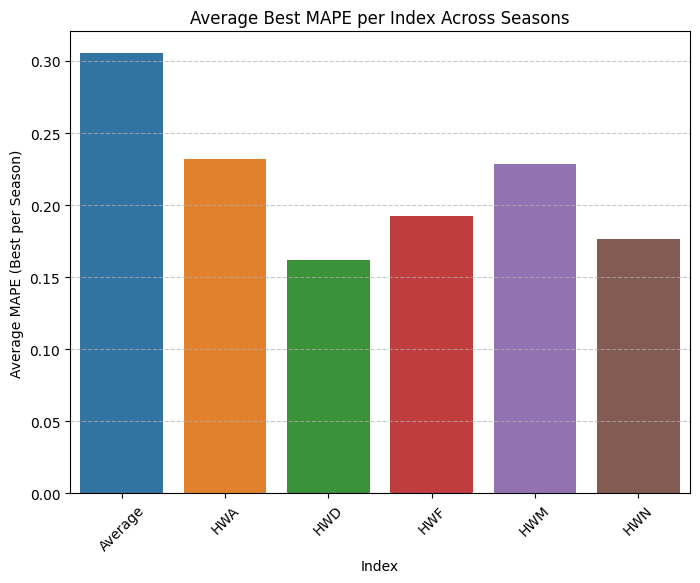

In [13]:
# Example usage
plot_average_best_results(r2_seasons, "R²", "Average Best R² per Index Across Seasons")
plot_average_best_results(tscv_r2_seasons, "CV R²", "Average Best TSCV R² per Index Across Seasons")
plot_average_best_results(mape_seasons, "MAPE", "Average Best MAPE per Index Across Seasons")

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(r2_seasons.sort_values("best_value", ascending=False))

model  season   id_data    index  best_value  training_value   
2       RF5       7  d53af68d      HWD    0.986058        0.811888  \
3   SLSTM16       7  707bacc6      HWF    0.985771        0.583720   
2   SLSTM16      12  d0b70da8      HWD    0.965089        0.039026   
2    Linear      11  13978dd3      HWD    0.964174        0.617119   
3  CNNRNN16       8  20e64d75      HWF    0.963194        0.408549   
3   SLSTM16      12  d0b70da8      HWF    0.955289        0.131933   
5   SLSTM16      10  14cc57d2      HWN    0.953658        0.680458   
2  CNNRNN16       4  141689a6      HWD    0.953289        0.708749   
2  CNNRNN16       3  7c35fe20      HWD    0.947427        0.778589   
2   SLSTM16      10  14cc57d2      HWD    0.940941        0.752932   
4   SLSTM16      10  14cc57d2      HWM    0.937334        0.648058   
5   SLSTM16      12  93d9825b      HWN    0.930170        0.205673   
0   SLSTM16      10  14cc57d2  Average    0.924663        0.706218   
5   SLSTM16       7  707bacc6      HWN    0.924598        0.602071   
1   SLSTM16      12  93d9825b      HWA    0.911623        0.164316   
5  CNNRNN16       1  369f50ac      HWN    0.910089        0.831419   
4    Linear       7  ce3212c2      HWM    0.905206        0.598336   
4    Linear       1  f8dcf6a5      HWM    0.901134        0.881917   
1   SLSTM16      10  14cc57d2      HWA    0.900028        0.678102   
5   SLSTM16      11  20e64d75      HWN    0.899876        0.866503   
1    Linear       1  f8dcf6a5      HWA    0.896659        0.872206   
2  CNNRNN16       8  d2f54f2b      HWD    0.896190        0.484721   
3   SLSTM16      10  82681439      HWF    0.892537        0.631791   
4  CNNRNN16       8  e0064ab0      HWM    0.887298        0.490525   
1    Linear       7  d53af68d      HWA    0.885691        0.594391   
3     XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
2     XGB15       6  d2f54f2b      HWD    0.885517        0.893113   
5   SLSTM16       9  87eea47c      HWN    0.882893       -0.174882   
0   SLSTM16      12  93d9825b  Average    0.880550        0.196458   
3   SLSTM16       9  87eea47c      HWF    0.877954       -0.226165   
5   SLSTM16       8  b38625fe      HWN    0.875892        0.248339   
2  CNNRNN16       5  c7dd2321      HWD    0.874354        0.016162   
6   SLSTM16       6  0c63f5a6      HWN    0.872533       -0.289425   
4  CNNRNN16      12  20e64d75      HWM    0.872517        0.664409   
1    Linear      11  f4e1848d      HWA    0.867792        0.490372   
7    Linear       5  c7caeba3      HWN    0.866147        0.772203   
6    Linear       5  c7caeba3      HWN    0.866147        0.772203   
3   SLSTM16       3  be431100      HWF    0.866040        0.130469   
0   SLSTM16       7  c7caeba3  Average    0.860653        0.366242   
4    Linear       5  c7caeba3      HWF    0.852602        0.822770   
3    Linear       5  c7caeba3      HWF    0.852602        0.822770   
4  CNNRNN16       3  f2406afd      HWM    0.852310       -0.115883   
2   SLSTM16       9  1b997608      HWD    0.850406        0.790191   
1  CNNRNN16       3  f2406afd      HWA    0.845041        0.089227   
4   SLSTM16       6  eb2b4ab1      HWF    0.842792       -0.036058   
3    Linear      11  13978dd3      HWF    0.840437        0.630486   
5     XGB15       0  a2045b15      HWN    0.837306        0.862463   
1  CNNRNN16       8  e2183a49      HWA    0.833695        0.725609   
5  CNNRNN16       3  2f5a1945      HWN    0.829994        0.889047   
4  CNNRNN16       4  2728d009      HWM    0.828984        0.670573   
5   SLSTM16       5  63723b54      HWM    0.823273        0.083948   
4  CNNRNN16      11  07c355d1      HWM    0.822837       -0.403594   
3    Linear       1  f8698b6f      HWF    0.819107        0.869194   
4       RF5       9  dfe0cb02      HWM    0.818619        0.785777   
3    Linear       0  9704d4e5      HWF    0.811500        0.342373   
1  CNNRNN16       5  38af6be5      HWA    0.809761       -0.031164   
2    Linear     

In [15]:
tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

model    index  best_value   id_data                       filename   
0   SLSTM16  Average    0.866591  134731c8   predictor_134731c8_1.parquet  \
1   SLSTM16      HWA    0.907689  134731c8   predictor_134731c8_1.parquet   
2   SLSTM16      HWD    0.772449  3026e6d4   predictor_3026e6d4_1.parquet   
3   SLSTM16      HWF    0.852822  134731c8   predictor_134731c8_1.parquet   
4   SLSTM16      HWM    0.898480  134731c8   predictor_134731c8_1.parquet   
5   SLSTM16      HWN    0.928950  134731c8   predictor_134731c8_1.parquet   
1   SLSTM16      HWA    0.720434  f1e19ccf   predictor_f1e19ccf_2.parquet   
1  CNNRNN16      HWA    0.710067  4ccfcb80   predictor_4ccfcb80_3.parquet   
2  CNNRNN16      HWD    0.767790  369f50ac   predictor_369f50ac_3.parquet   
2  CNNRNN16      HWD    0.755254  d0b70da8   predictor_d0b70da8_5.parquet   
3  CNNRNN16      HWF    0.716481  d0b70da8   predictor_d0b70da8_5.parquet   
5  CNNRNN16      HWN    0.762540  d0b70da8   predictor_d0b70da8_5.parquet   
0  CNNRNN16  Average    0.811530  8476ed61   predictor_8476ed61_6.parquet   
1  CNNRNN16      HWA    0.750384  8476ed61   predictor_8476ed61_6.parquet   
2  CNNRNN16      HWD    0.856997  8476ed61   predictor_8476ed61_6.parquet   
3  CNNRNN16      HWF    0.887310  8476ed61   predictor_8476ed61_6.parquet   
4  CNNRNN16      HWM    0.714222  dcddde06   predictor_dcddde06_6.parquet   
5  CNNRNN16      HWN    0.863145  8476ed61   predictor_8476ed61_6.parquet   
0   SLSTM16  Average    0.869502  d0b70da8   predictor_d0b70da8_7.parquet   
1   SLSTM16      HWA    0.855805  d0b70da8   predictor_d0b70da8_7.parquet   
2  CNNRNN16      HWD    0.930413  f12d9b95   predictor_f12d9b95_7.parquet   
3  CNNRNN16      HWF    0.924386  f12d9b95   predictor_f12d9b95_7.parquet   
4  CNNRNN16      HWM    0.829974  31df530c   predictor_31df530c_7.parquet   
5   SLSTM16      HWN    0.875348  d0b70da8   predictor_d0b70da8_7.parquet   
0  CNNRNN16  Average    0.712609  a6a3b0e8   predictor_a6a3b0e8_8.parquet   
1   SLSTM16      HWA    0.783434  d38dad7b   predictor_d38dad7b_8.parquet   
3   SLSTM16      HWF    0.812544  5cb46bcc   predictor_5cb46bcc_8.parquet   
4   SLSTM16      HWM    0.815897  d38dad7b   predictor_d38dad7b_8.parquet   
0   SLSTM16  Average    0.705785  31df530c   predictor_31df530c_9.parquet   
2   SLSTM16      HWD    0.832176  31df530c   predictor_31df530c_9.parquet   
3   SLSTM16      HWF    0.823834  31df530c   predictor_31df530c_9.parquet   
0   SLSTM16  Average    0.786292  656a4ffb  predictor_656a4ffb_10.parquet   
1   SLSTM16      HWA    0.753362  656a4ffb  predictor_656a4ffb_10.parquet   
2   SLSTM16      HWD    0.856494  22250158  predictor_22250158_10.parquet   
3   SLSTM16      HWF    0.841354  656a4ffb  predictor_656a4ffb_10.parquet   
4   SLSTM16      HWM    0.748602  656a4ffb  predictor_656a4ffb_10.parquet   
5   SLSTM16      HWN    0.754383  656a4ffb  predictor_656a4ffb_10.parquet   
0   SLSTM16  Average    0.787692  3026e6d4  predictor_3026e6d4_11.parquet   
1   SLSTM16      HWA    0.834976  e0064ab0  predictor_e0064ab0_11.parquet   
2   SLSTM16      HWD    0.903952  3026e6d4  predictor_3026e6d4_11.parquet   
3   SLSTM16      HWF    0.887514  3026e6d4  predictor_3026e6d4_11.parquet   
4   SLSTM16      HWM    0.829033  e0064ab0  predictor_e0064ab0_11.parquet   
5   SLSTM16      HWN    0.845719  20e64d75  predictor_20e64d75_11.parquet   
0  CNNRNN16  Average    0.800110  f1e19ccf  predictor_f1e19ccf_12.parquet   
1  CNNRNN16      HWA    0.820964  f1e19ccf  predictor_f1e19ccf_12.parquet   
2  CNNRNN16      HWD    0.835131  f1e19ccf  predictor_f1e19ccf_12.parquet   
3   SLSTM16      HWF    0.840575  8684951e  predictor_8684951e_12.parquet   
4  CNNRNN16      HWM    0.749139  f1e19ccf  predictor_f1e19ccf_12.parquet   
5   SLSTM16      HWN    0.825472  51552bc6  predictor_51552bc6_12.parquet   

   boxes  top_n  var_thresh  modes frequency  season methods extra_indices   
0      0     30        0.15      3  2monthly       1      ps           NaN  \

In [16]:
with open("pcas_1972.pkl", "rb") as inp:
    pcas_sst = pickle.load(inp)
interest_ids = cv_r2_seasons[(cv_r2_seasons["best_value"] >= 0.4)]
df1 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        continue
    else:
        temp = ""
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in row["extra_indices"]:
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
                k+=1
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_sst[id_pca].variables_dict.values())
            box = pcas_sst[id_pca].box
            mode = pcas[i][-1]
            df1.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_sst
display(df1)



id_data id_pca  mode                   box                variables
0   22250158   None  None                  None                      PDO
1   22250158   None  None                  None                      ONI
2   22250158   None  None                  None                      SAM
3   22250158    131     3  [205, 247.5, 30, 60]                      [Z]
4   22250158   1085     3    [205, 290, 30, 60]                  [SP, Z]
5   22250158    140     3  [205, 247.5, 30, 60]                  [SP, Z]
6   22250158   1076     3    [205, 290, 30, 60]                      [Z]
7   22250158    161     3  [205, 247.5, 30, 60]             [SP, U10, Z]
8   22250158   1090     3    [205, 290, 30, 60]                 [U10, Z]
9   22250158    127     3  [205, 247.5, 30, 60]                     [SP]
10  22250158    145     3  [205, 247.5, 30, 60]                 [U10, Z]
11  22250158   1106     3    [205, 290, 30, 60]             [SP, U10, Z]
12  22250158    442     3   [247.5, 290, 0, 30]                     [SP]
13  22250158    181     3  [205, 247.5, 30, 60]       [TTR, U10, V10, Z]
14  22250158   1091     2    [205, 290, 30, 60]                 [V10, Z]
15  22250158   1110     3    [205, 290, 30, 60]            [TTR, V10, Z]
16  22250158    186     3  [205, 247.5, 30, 60]  [SST, TTR, U10, V10, Z]
17  22250158   1131     3    [205, 290, 30, 60]  [SST, TTR, U10, V10, Z]
18  22250158   1105     3    [205, 290, 30, 60]           [SP, U10, V10]
19  22250158   1126     3    [205, 290, 30, 60]       [TTR, U10, V10, Z]
20  22250158   1120     3    [205, 290, 30, 60]       [SST, TTR, V10, Z]
21  22250158    180     3  [205, 247.5, 30, 60]        [SP, U10, V10, Z]
22  22250158   1101     2    [205, 290, 30, 60]            [SST, V10, Z]

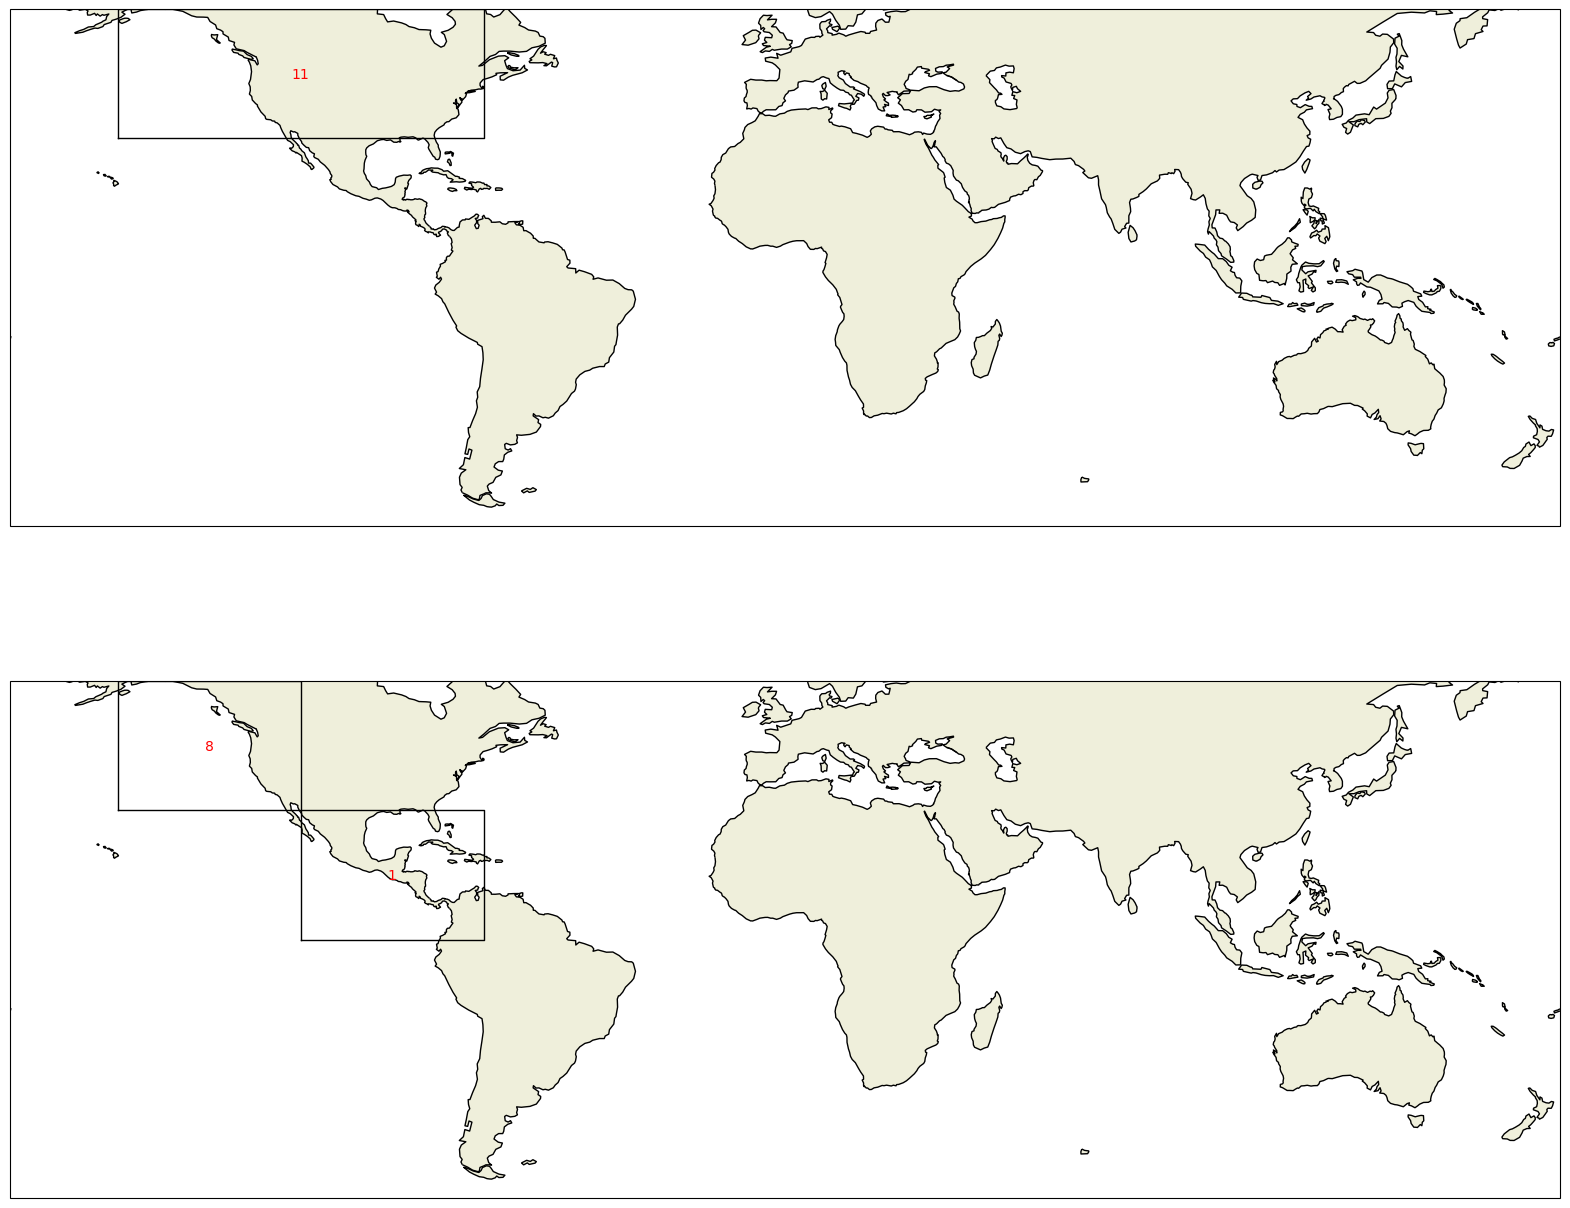

In [17]:
plot_grid_count(df1)

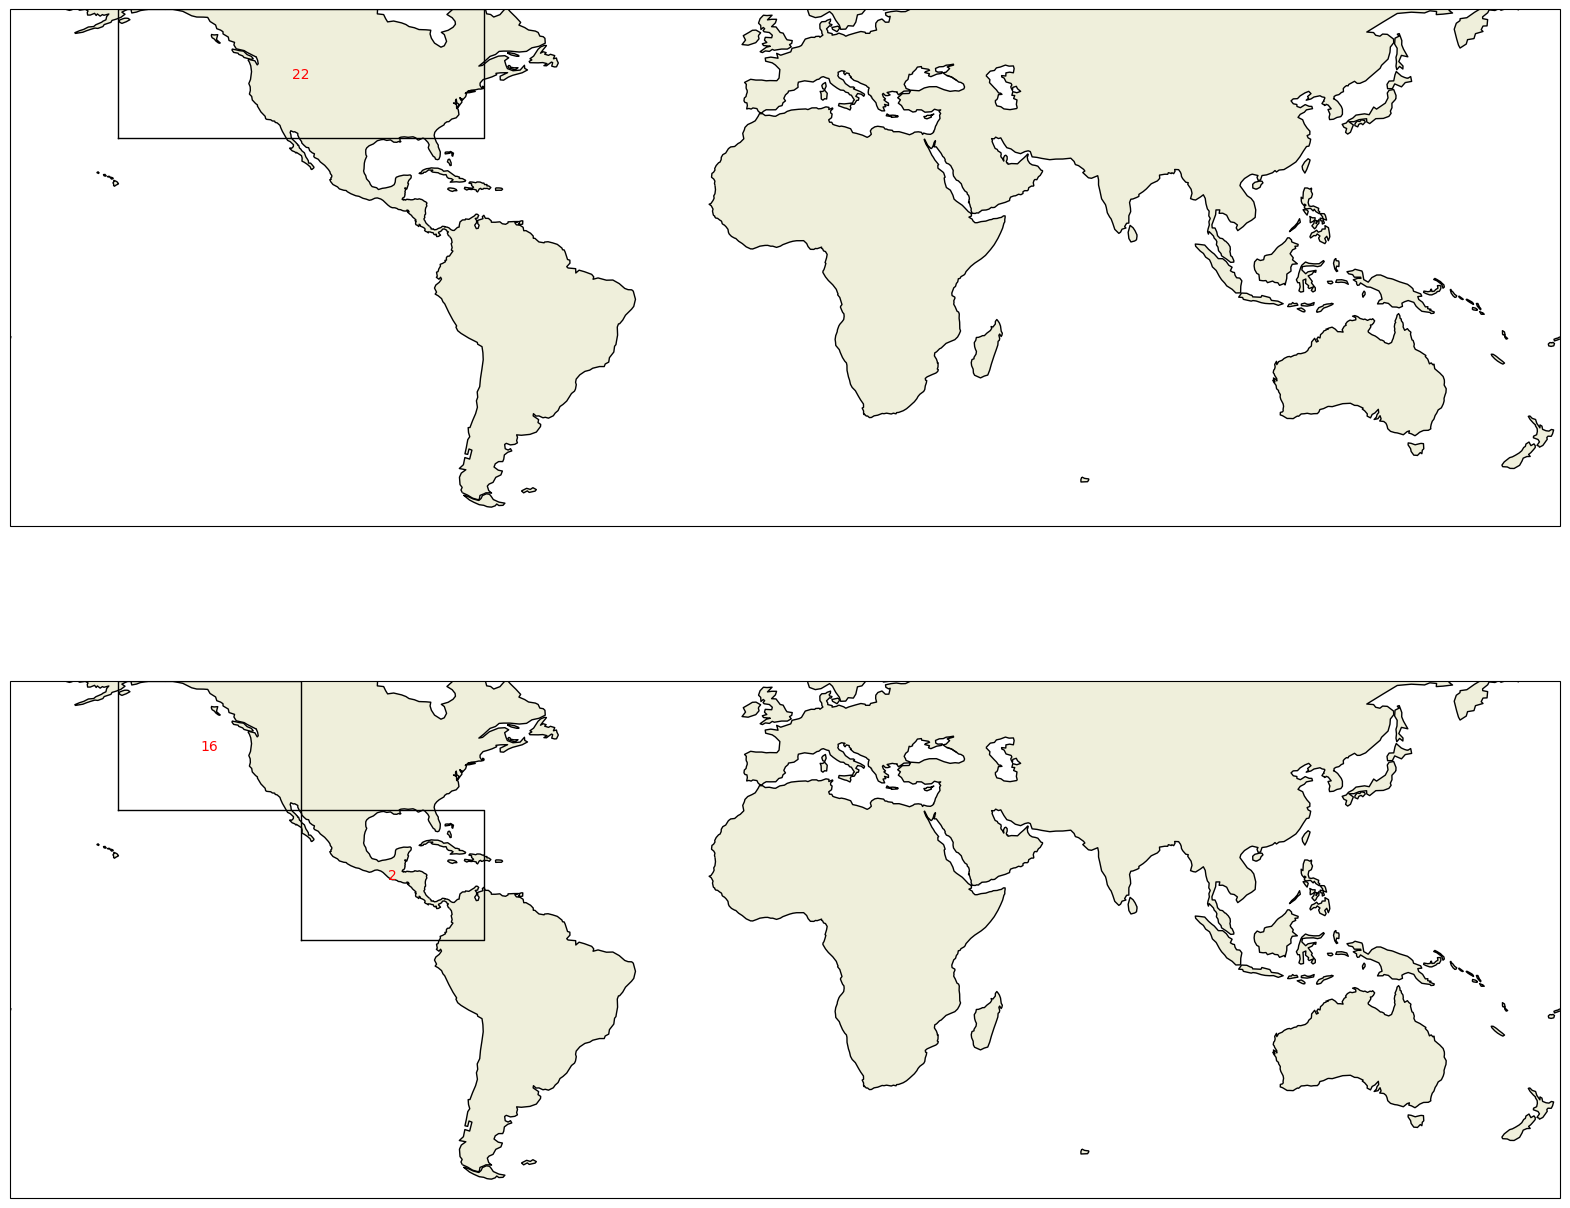

In [ ]:
# plot_grid_count(df1) old

In [18]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
interest_ids = tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        temp = "_t2m"
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in str(row["extra_indices"]):
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                   box      variables
0    4ccfcb80     144    1  [205, 247.5, 30, 60]       [V10, Z]
1    4ccfcb80     166    1  [205, 247.5, 30, 60]  [V10, Z, T2M]
2    4ccfcb80     130    1  [205, 247.5, 30, 60]            [Z]
3    4ccfcb80     145    1  [205, 247.5, 30, 60]     [V10, T2M]
4    4ccfcb80     146    1  [205, 247.5, 30, 60]       [Z, T2M]
..        ...     ...  ...                   ...            ...
290  5cb46bcc     580    2  [162.5, 205, -30, 0]       [TTR, Z]
291  5cb46bcc    1288    2    [120, 205, -30, 0]   [SP, V10, Z]
292  5cb46bcc    1234    2     [205, 290, 0, 30]  [U10, V10, Z]
293  5cb46bcc    1296    2    [120, 205, -30, 0]  [TTR, Z, T2M]
294  5cb46bcc     146    2  [205, 247.5, 30, 60]       [Z, T2M]

[295 rows x 5 columns]

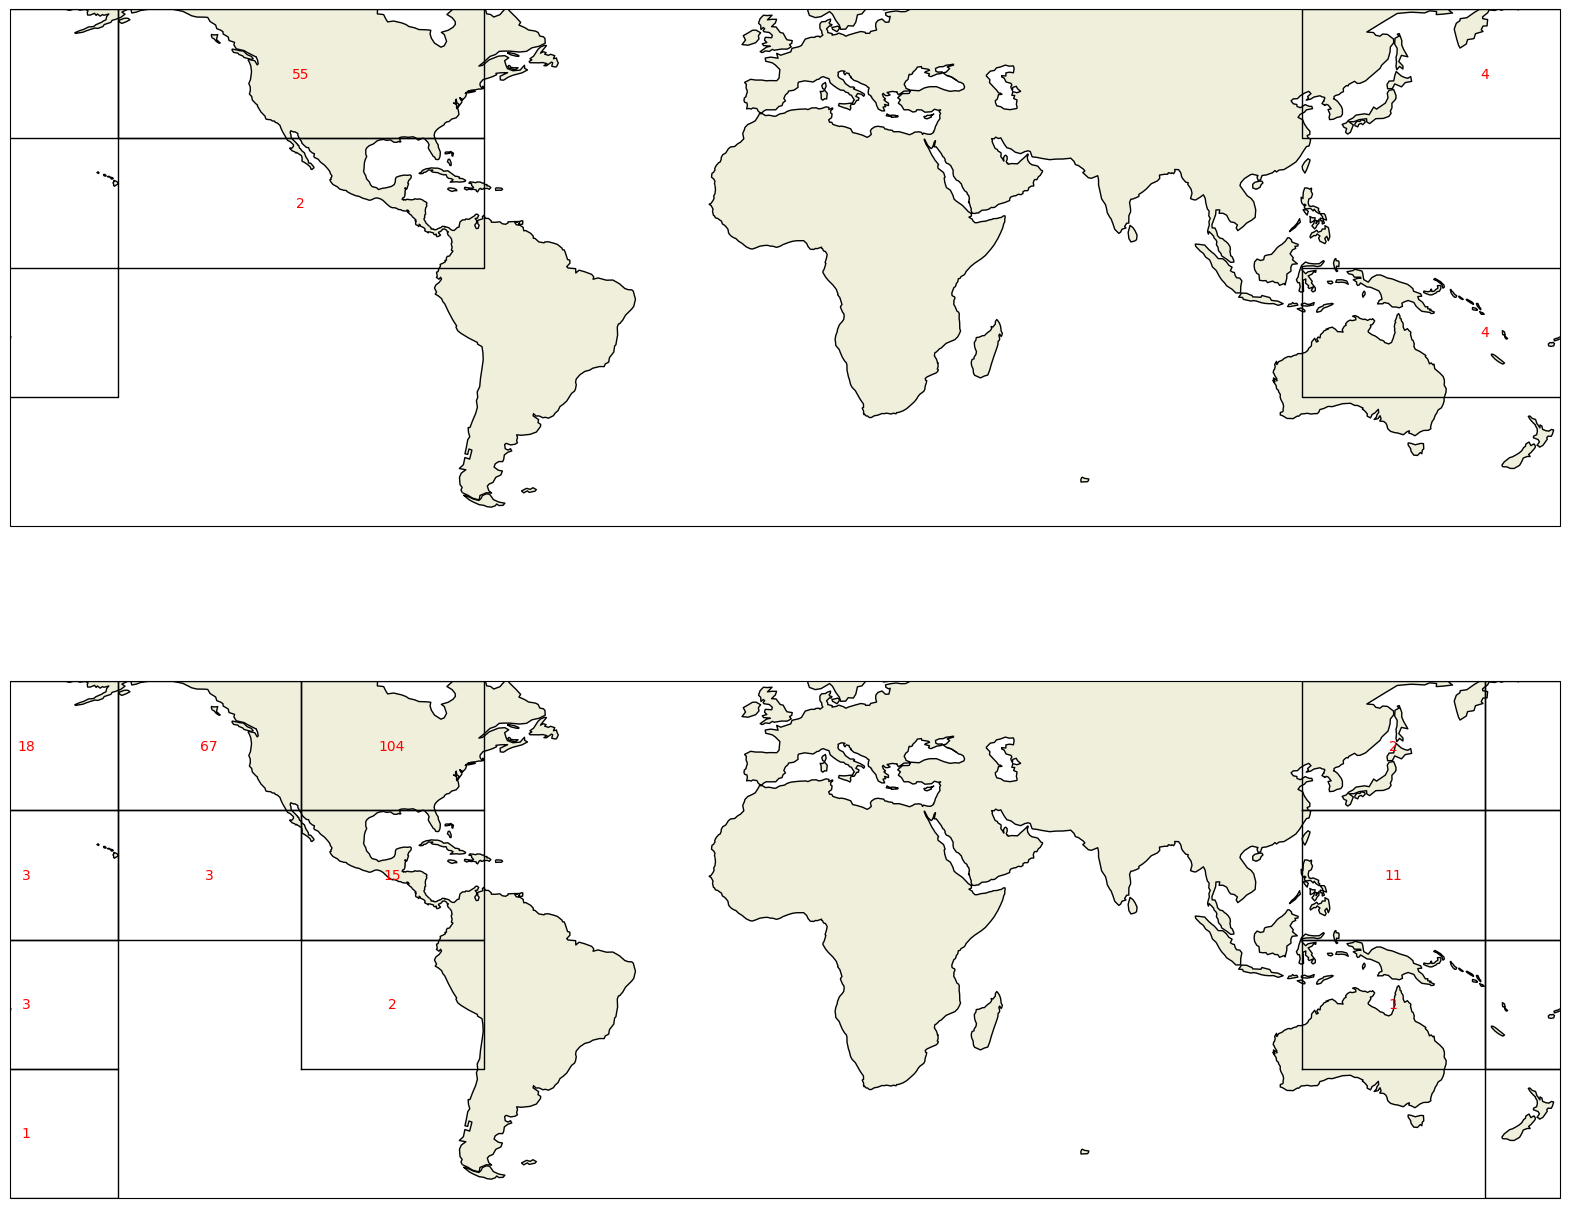

In [19]:
plot_grid_count(df2)

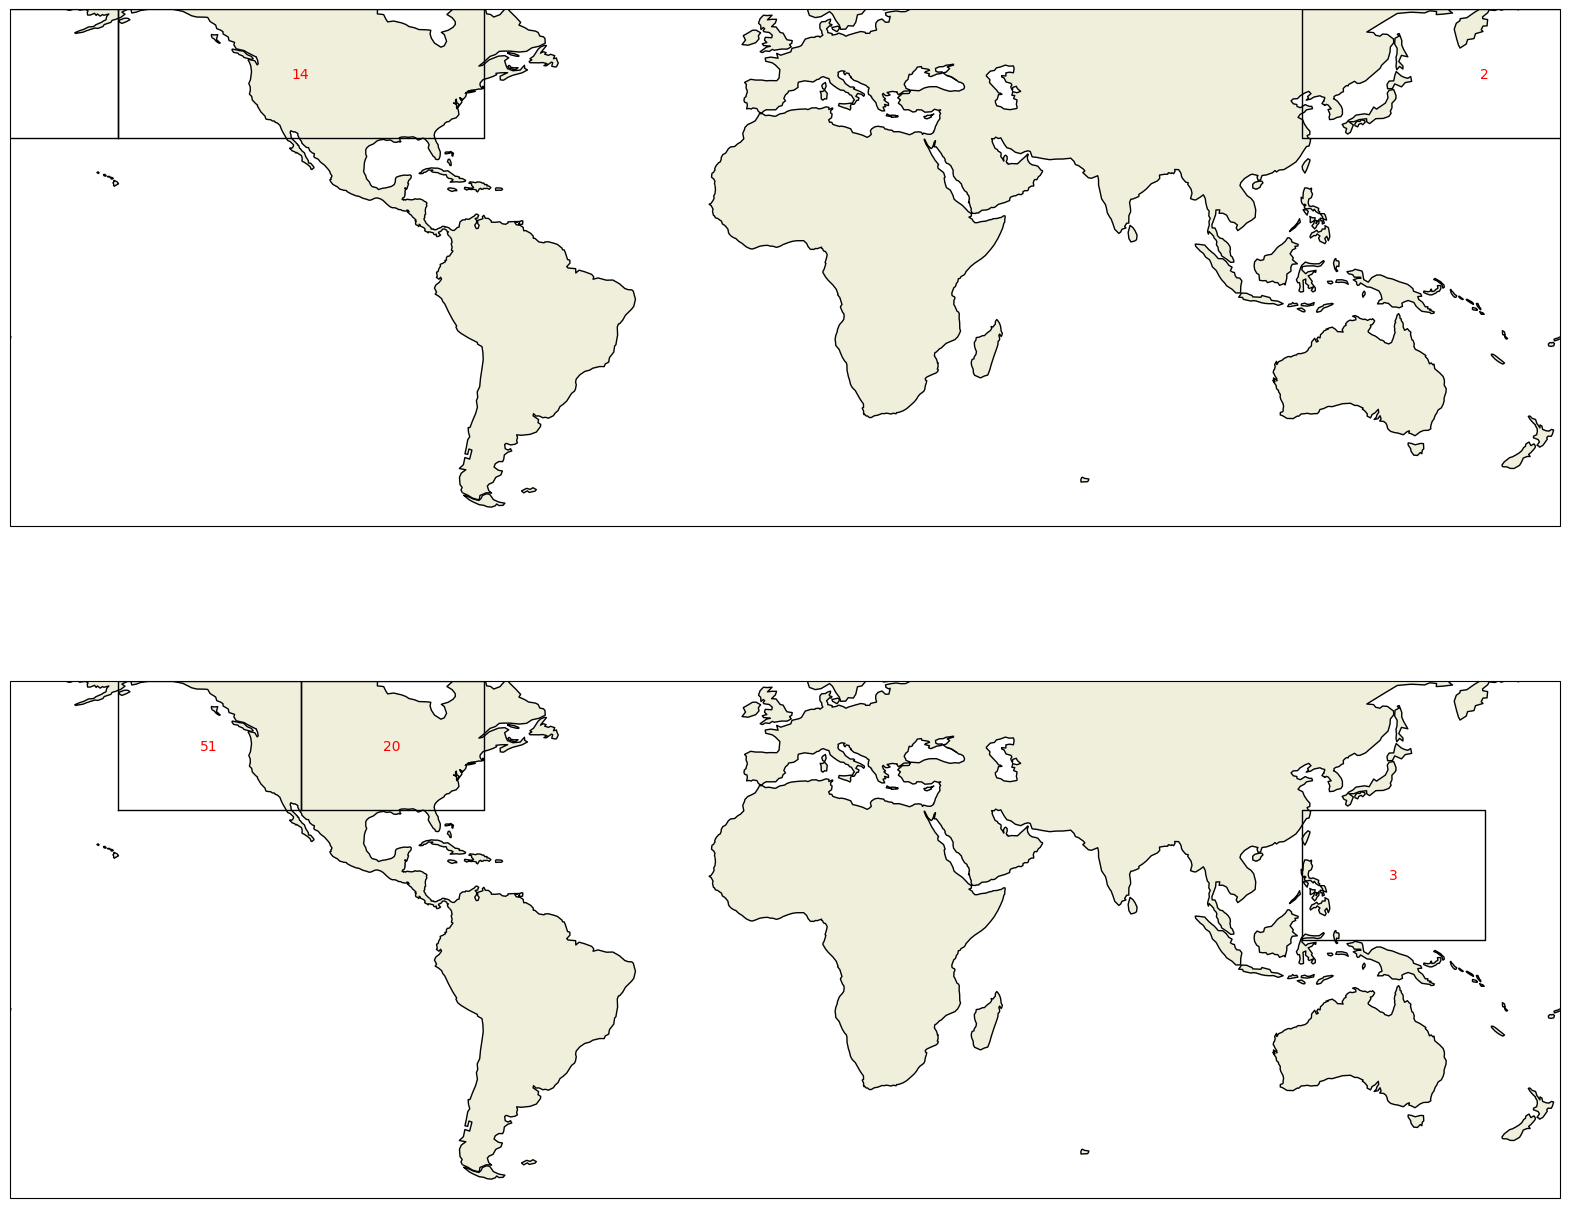

In [ ]:
# plot_grid_count(df2) old

## Chile

In [20]:
region = "chile"
FREQUENCY= "2monthly"
metadata_sst = pd.read_csv(f"data/new_features/{region}/metadata.csv")
metadata_t2m = pd.read_csv(f"data/new_features_t2m/{region}/metadata.csv")
metadata = pd.concat((metadata_sst,metadata_t2m))
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

id_data                       filename  boxes  top_n  var_thresh   
0     193d753c     predictor_193d753c.parquet      0      5         NaN  \
1     2775aa34     predictor_2775aa34.parquet      0     10         NaN   
2     25a8ed97     predictor_25a8ed97.parquet      0     15         NaN   
3     7da22af6     predictor_7da22af6.parquet      0     20         NaN   
4     daef6aaa     predictor_daef6aaa.parquet      0     30         NaN   
...        ...                            ...    ...    ...         ...   
1495  a59026f4   predictor_a59026f4_8.parquet      0     30        0.15   
1496  a59026f4   predictor_a59026f4_9.parquet      0     30        0.15   
1497  a59026f4  predictor_a59026f4_10.parquet      0     30        0.15   
1498  a59026f4  predictor_a59026f4_11.parquet      0     30        0.15   
1499  a59026f4  predictor_a59026f4_12.parquet      0     30        0.15   

      modes frequency  season methods extra_indices  only_sea  
0         1    yearly       0      ps           NaN      True  
1         1    yearly       0      ps           NaN      True  
2         1    yearly       0      ps           NaN      True  
3         1    yearly       0      ps           NaN      True  
4         1    yearly       0      ps           NaN      True  
...     ...       ...     ...     ...           ...       ...  
1495      3  2monthly       8      ps   PDO-ONI-SAM     False  
1496      3  2monthly       9      ps   PDO-ONI-SAM     False  
1497      3  2monthly      10      ps   PDO-ONI-SAM     False  
1498      3  2monthly      11      ps   PDO-ONI-SAM     False  
1499      3  2monthly      12      ps   PDO-ONI-SAM     False  

[3000 rows x 11 columns]

In [21]:
results_sst = pd.read_csv(f"data/{region}_results/results_sst.csv")
results_t2m = pd.read_csv(f"data/{region}_results/results.csv")
results = pd.concat((results_sst,results_t2m))
results

model  season metric       stage       HWN       HWF       HWD   
0         Linear       1     r2  prediction -0.013273 -0.494648 -0.638861  \
1            RF5       1     r2  prediction -0.570155 -1.468624 -1.518753   
2           RF10       1     r2  prediction -0.675097 -1.390106 -1.573718   
3        SVR-rbf       1     r2  prediction -0.159107 -1.274360 -1.693932   
4          XGB10       1     r2  prediction -0.738051 -1.100790 -0.870228   
...          ...     ...    ...         ...       ...       ...       ...   
132355  CNNRNN16      10   mape        TSCV  1.811653  3.966835  2.884798   
132356   SLSTM16      11   mape        TSCV  3.015681  1.485459  5.254072   
132357  CNNRNN16      11   mape        TSCV  2.161642  1.120916  4.057204   
132358   SLSTM16      12   mape        TSCV  0.574519  0.476246  0.573523   
132359  CNNRNN16      12   mape        TSCV  1.897860  0.942321  2.660384   

             HWM       HWA   Average   id_data  
0       0.143481 -0.007388 -0.202138  515c5f16  
1      -0.231282 -0.142382 -0.786239  515c5f16  
2      -0.083434 -0.680643 -0.880600  515c5f16  
3      -0.236283 -0.432886 -0.759314  515c5f16  
4      -0.430557 -0.588640 -0.745653  515c5f16  
...          ...       ...       ...       ...  
132355  1.859804  3.665919  2.837802  a59026f4  
132356  3.549545  3.408951  3.342742  a59026f4  
132357  2.711474  1.974372  2.405121  a59026f4  
132358  0.537411  0.607364  0.553812  a59026f4  
132359  1.380837  1.377127  1.651706  a59026f4  

[210120 rows x 11 columns]

In [22]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=5, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")


In [23]:
summary_tscv_r2

model  season   id_data    index  best_value   
0    SLSTM16       5  cd73caec  Average    0.807845  \
1    SLSTM16      12  2c4eaae6  Average    0.800373   
2    SLSTM16      12  2c4eaae6      HWA    0.876636   
3   CNNRNN16      12  949505af      HWA    0.868348   
4    SLSTM16       5  cd73caec      HWD    0.870102   
5    SLSTM16       6  c3ae3c4c      HWD    0.851251   
6   CNNRNN16       7  6ea5a75b      HWF    0.851592   
7    SLSTM16       7  c35f74dd      HWF    0.844601   
8   CNNRNN16      12  949505af      HWM    0.910974   
9    SLSTM16      12  2c4eaae6      HWM    0.893298   
10   SLSTM16       5  cd73caec      HWN    0.836690   
11   SLSTM16       7  c35f74dd      HWN    0.830364   

                         filename  boxes  top_n  var_thresh  modes frequency   
0    predictor_cd73caec_5.parquet      0     10        0.05      3  2monthly  \
1   predictor_2c4eaae6_12.parquet      0     30        0.15      2  2monthly   
2   predictor_2c4eaae6_12.parquet      0     30        0.15      2  2monthly   
3   predictor_949505af_12.parquet      0     30        0.05      2  2monthly   
4    predictor_cd73caec_5.parquet      0     10        0.05      3  2monthly   
5    predictor_c3ae3c4c_6.parquet      0     30        0.10      3  2monthly   
6    predictor_6ea5a75b_7.parquet      0     15        0.15      2  2monthly   
7    predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly   
8   predictor_949505af_12.parquet      0     30        0.05      2  2monthly   
9   predictor_2c4eaae6_12.parquet      0     30        0.15      2  2monthly   
10   predictor_cd73caec_5.parquet      0     10        0.05      3  2monthly   
11   predictor_c35f74dd_7.parquet      0     30         NaN      3  2monthly   

   methods extra_indices  only_sea  
0       ps   PDO-ONI-SAM      True  
1       ps   PDO-ONI-SAM      True  
2       ps   PDO-ONI-SAM      True  
3       ps   PDO-ONI-SAM      True  
4       ps   PDO-ONI-SAM      True  
5       ps           NaN      True  
6       ps   PDO-ONI-SAM     False  
7       ps           NaN     False  
8       ps   PDO-ONI-SAM      True  
9       ps   PDO-ONI-SAM      True  
10      ps   PDO-ONI-SAM      True  
11      ps           NaN     False

Now we repite for each season

In [24]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [25]:
display_full(tscv_r2_seasons)

model    index  best_value   id_data                       filename   
0  CNNRNN16  Average    0.555224  7ec4afcb   predictor_7ec4afcb_1.parquet  \
1  CNNRNN16      HWA    0.683449  bc74a9b1   predictor_bc74a9b1_1.parquet   
2  CNNRNN16      HWD    0.437600  bc74a9b1   predictor_bc74a9b1_1.parquet   
3  CNNRNN16      HWF    0.399625  7ec4afcb   predictor_7ec4afcb_1.parquet   
4  CNNRNN16      HWM    0.721603  7ec4afcb   predictor_7ec4afcb_1.parquet   
5  CNNRNN16      HWN    0.641385  7ec4afcb   predictor_7ec4afcb_1.parquet   
0  CNNRNN16  Average   -0.303560  758ae625   predictor_758ae625_2.parquet   
1  CNNRNN16      HWA   -0.141678  758ae625   predictor_758ae625_2.parquet   
2  CNNRNN16      HWD   -0.167198  758ae625   predictor_758ae625_2.parquet   
3   SLSTM16      HWF   -0.330500  b28cc104   predictor_b28cc104_2.parquet   
4  CNNRNN16      HWM   -0.237721  75268daa   predictor_75268daa_2.parquet   
5   SLSTM16      HWN   -0.482613  b28cc104   predictor_b28cc104_2.parquet   
0   SLSTM16  Average    0.615273  f6801988   predictor_f6801988_3.parquet   
1   SLSTM16      HWA    0.694395  006588db   predictor_006588db_3.parquet   
2   SLSTM16      HWD    0.473419  f6801988   predictor_f6801988_3.parquet   
3   SLSTM16      HWF    0.730280  f6801988   predictor_f6801988_3.parquet   
4   SLSTM16      HWM    0.695327  006588db   predictor_006588db_3.parquet   
5   SLSTM16      HWN    0.720702  f6801988   predictor_f6801988_3.parquet   
0   SLSTM16  Average    0.635147  0f1dc279   predictor_0f1dc279_4.parquet   
1   SLSTM16      HWA    0.676474  0f1dc279   predictor_0f1dc279_4.parquet   
2  CNNRNN16      HWD    0.561435  09063d34   predictor_09063d34_4.parquet   
3   SLSTM16      HWF    0.633855  0f1dc279   predictor_0f1dc279_4.parquet   
4   SLSTM16      HWM    0.685783  0f1dc279   predictor_0f1dc279_4.parquet   
5   SLSTM16      HWN    0.635795  0f1dc279   predictor_0f1dc279_4.parquet   
0   SLSTM16  Average    0.807845  cd73caec   predictor_cd73caec_5.parquet   
1   SLSTM16      HWA    0.755885  cd73caec   predictor_cd73caec_5.parquet   
2   SLSTM16      HWD    0.870102  cd73caec   predictor_cd73caec_5.parquet   
3   SLSTM16      HWF    0.826208  cd73caec   predictor_cd73caec_5.parquet   
4   SLSTM16      HWM    0.750337  cd73caec   predictor_cd73caec_5.parquet   
5   SLSTM16      HWN    0.836690  cd73caec   predictor_cd73caec_5.parquet   
0   SLSTM16  Average    0.699744  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
1   SLSTM16      HWA    0.575188  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
2   SLSTM16      HWD    0.851251  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
3   SLSTM16      HWF    0.757310  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
4   SLSTM16      HWM    0.551977  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
5   SLSTM16      HWN    0.762994  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
0   SLSTM16  Average    0.717316  c35f74dd   predictor_c35f74dd_7.parquet   
1  CNNRNN16      HWA    0.611213  04a103c0   predictor_04a103c0_7.parquet   
2   SLSTM16      HWD    0.822891  c35f74dd   predictor_c35f74dd_7.parquet   
3  CNNRNN16      HWF    0.851592  6ea5a75b   predictor_6ea5a75b_7.parquet   
4  CNNRNN16      HWM    0.552288  04a103c0   predictor_04a103c0_7.parquet   
5   SLSTM16      HWN    0.830364  c35f74dd   predictor_c35f74dd_7.parquet   
0  CNNRNN16  Average    0.405577  19fb9132   predictor_19fb9132_8.parquet   
1  CNNRNN16      HWA    0.422477  8e3deb33   predictor_8e3deb33_8.parquet   
2  CNNRNN16      HWD    0.536474  19fb9132   predictor_19fb9132_8.parquet   
3  CNNRNN16      HWF    0.465283  8e3deb33   predictor_8e3deb33_8.parquet   
4  CNNRNN16      HWM    0.314752  19fb9132   predictor_19fb9132_8.parquet   
5  CNNRNN16      HWN    0.383134  19fb9132   predictor_19fb9132_8.parquet   
0   SLSTM16  Average    0.484689  fb472cb5   predictor_fb472cb5_9.parquet   
1   SLSTM16      HWA    0.722688  fb472cb5   predictor_fb472cb5_9.parquet   
2  CNNRNN16      HWD    0.513669  4253e219   predictor_4253e219_9.parquet   
3 

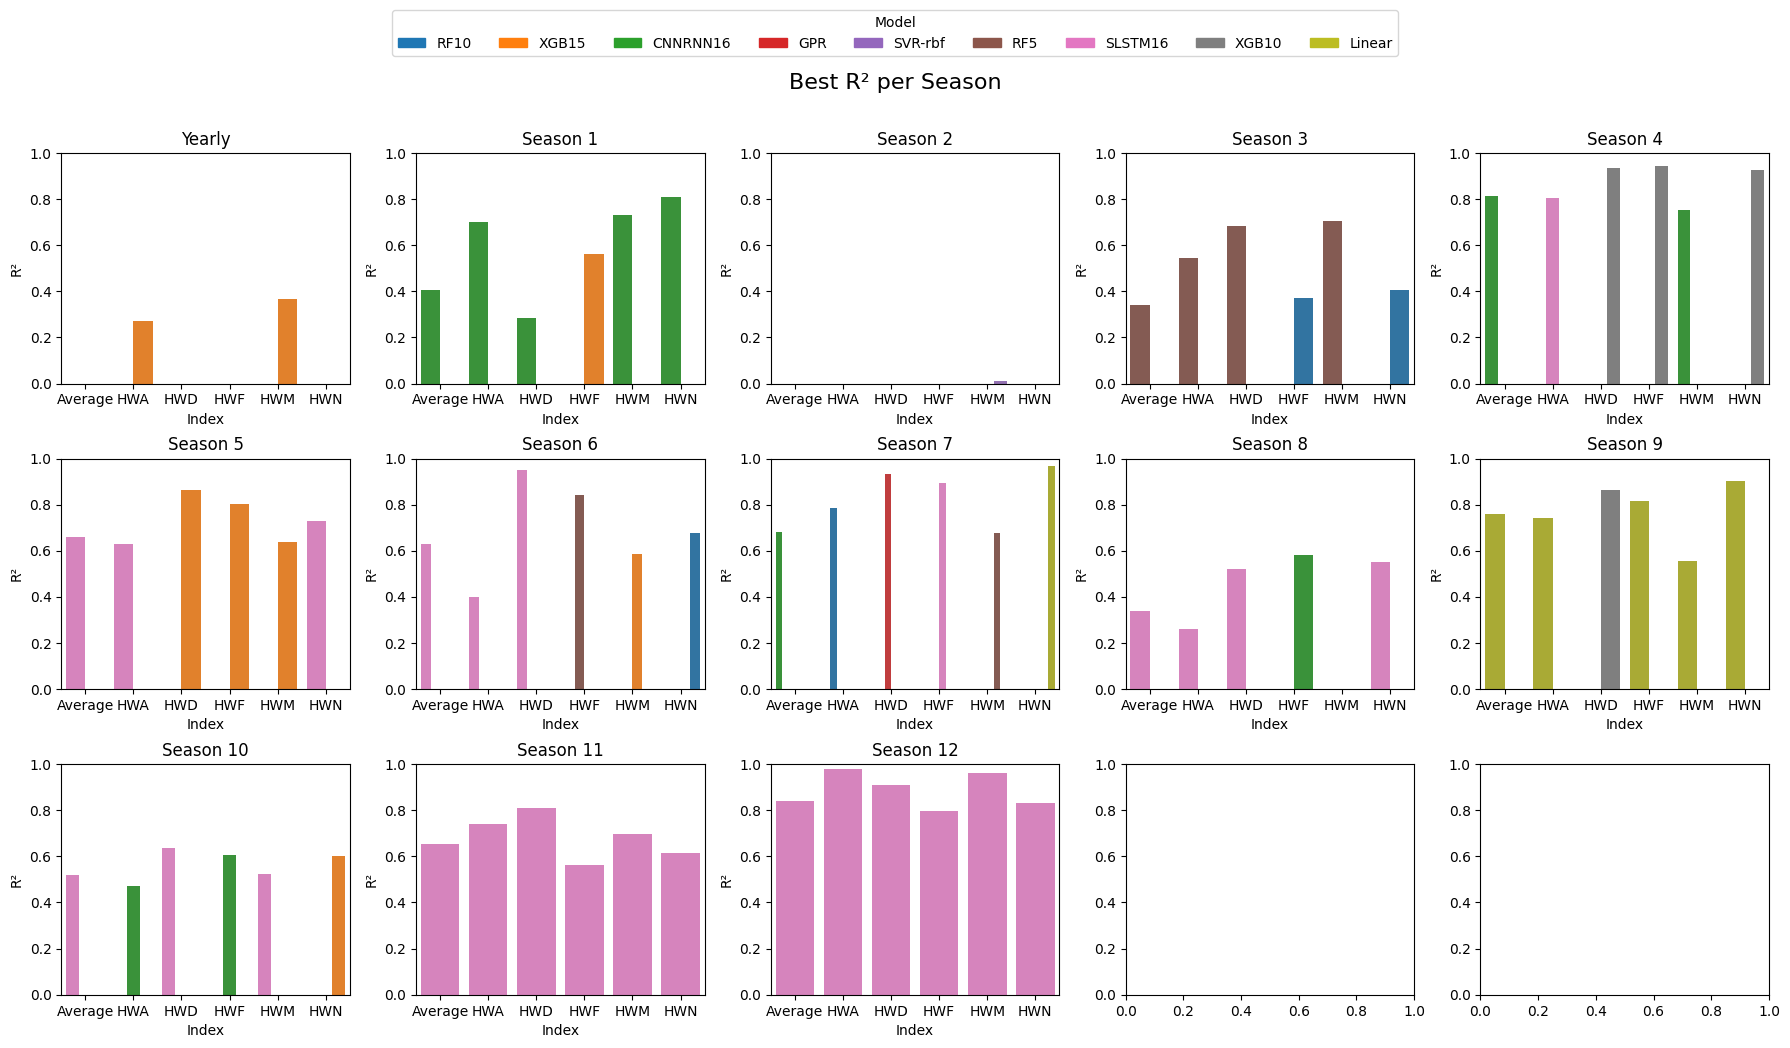

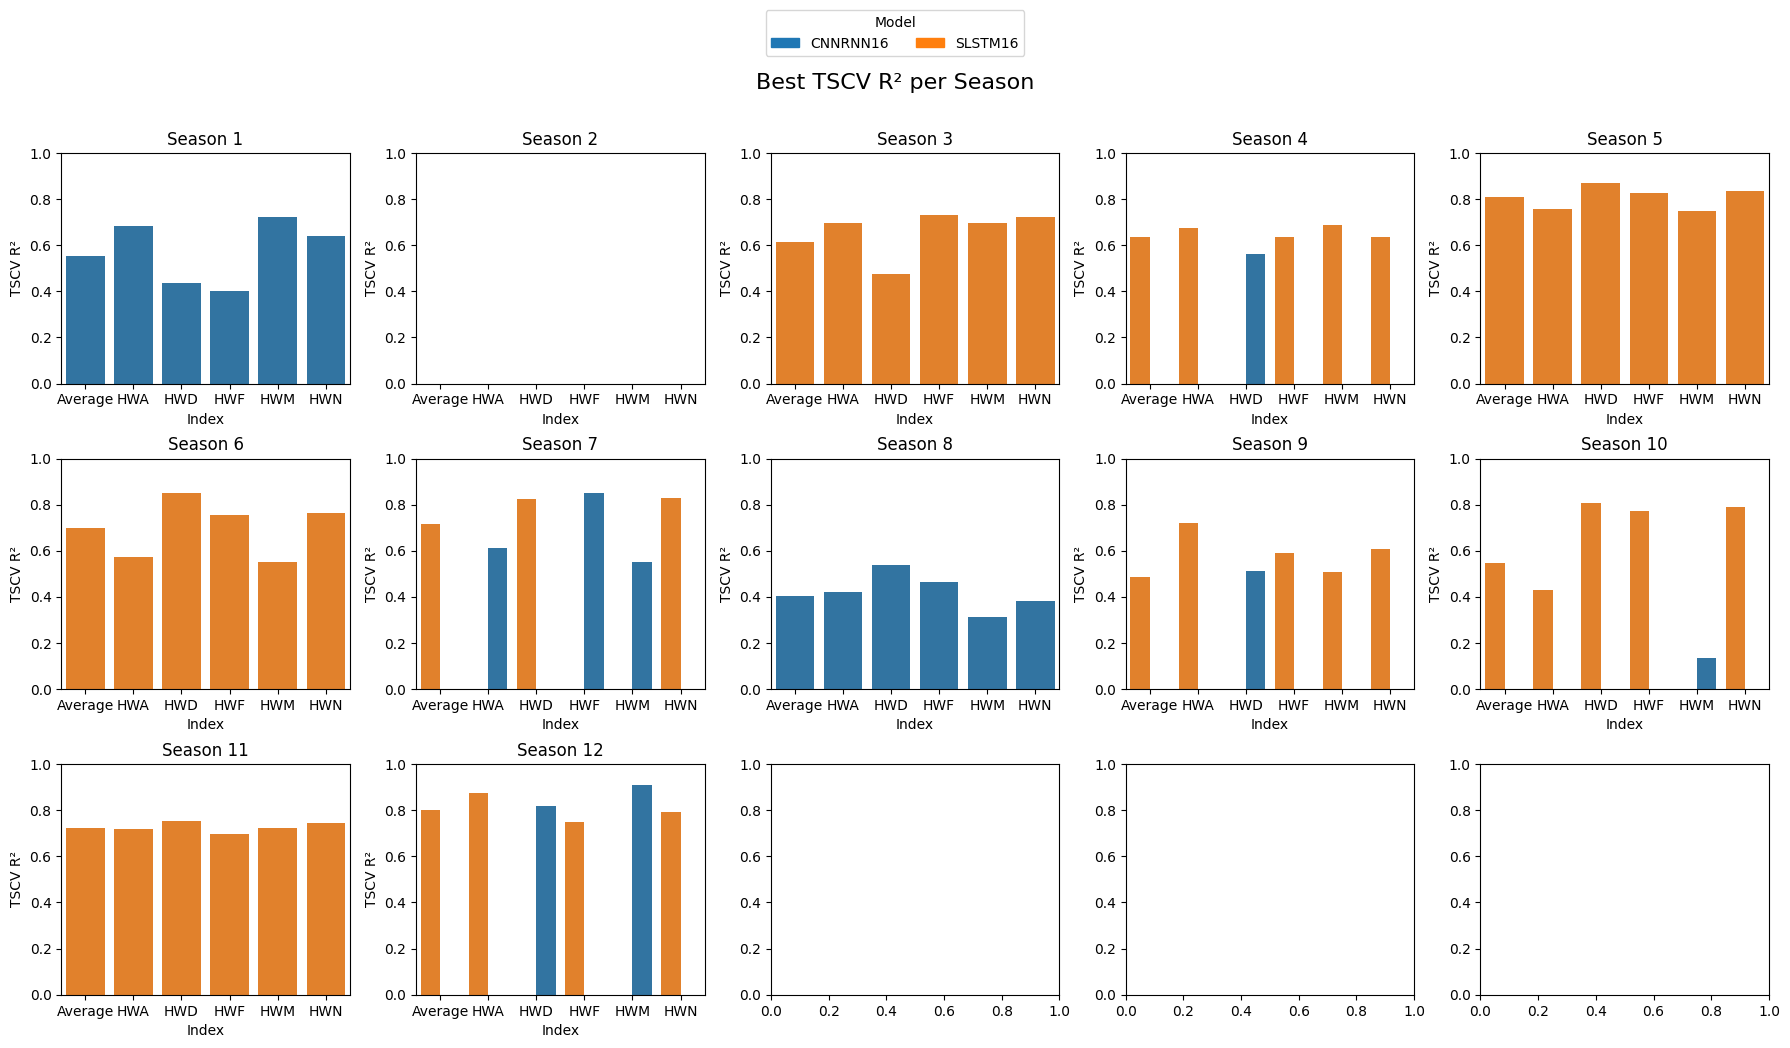

<Figure size 1800x1000 with 0 Axes>

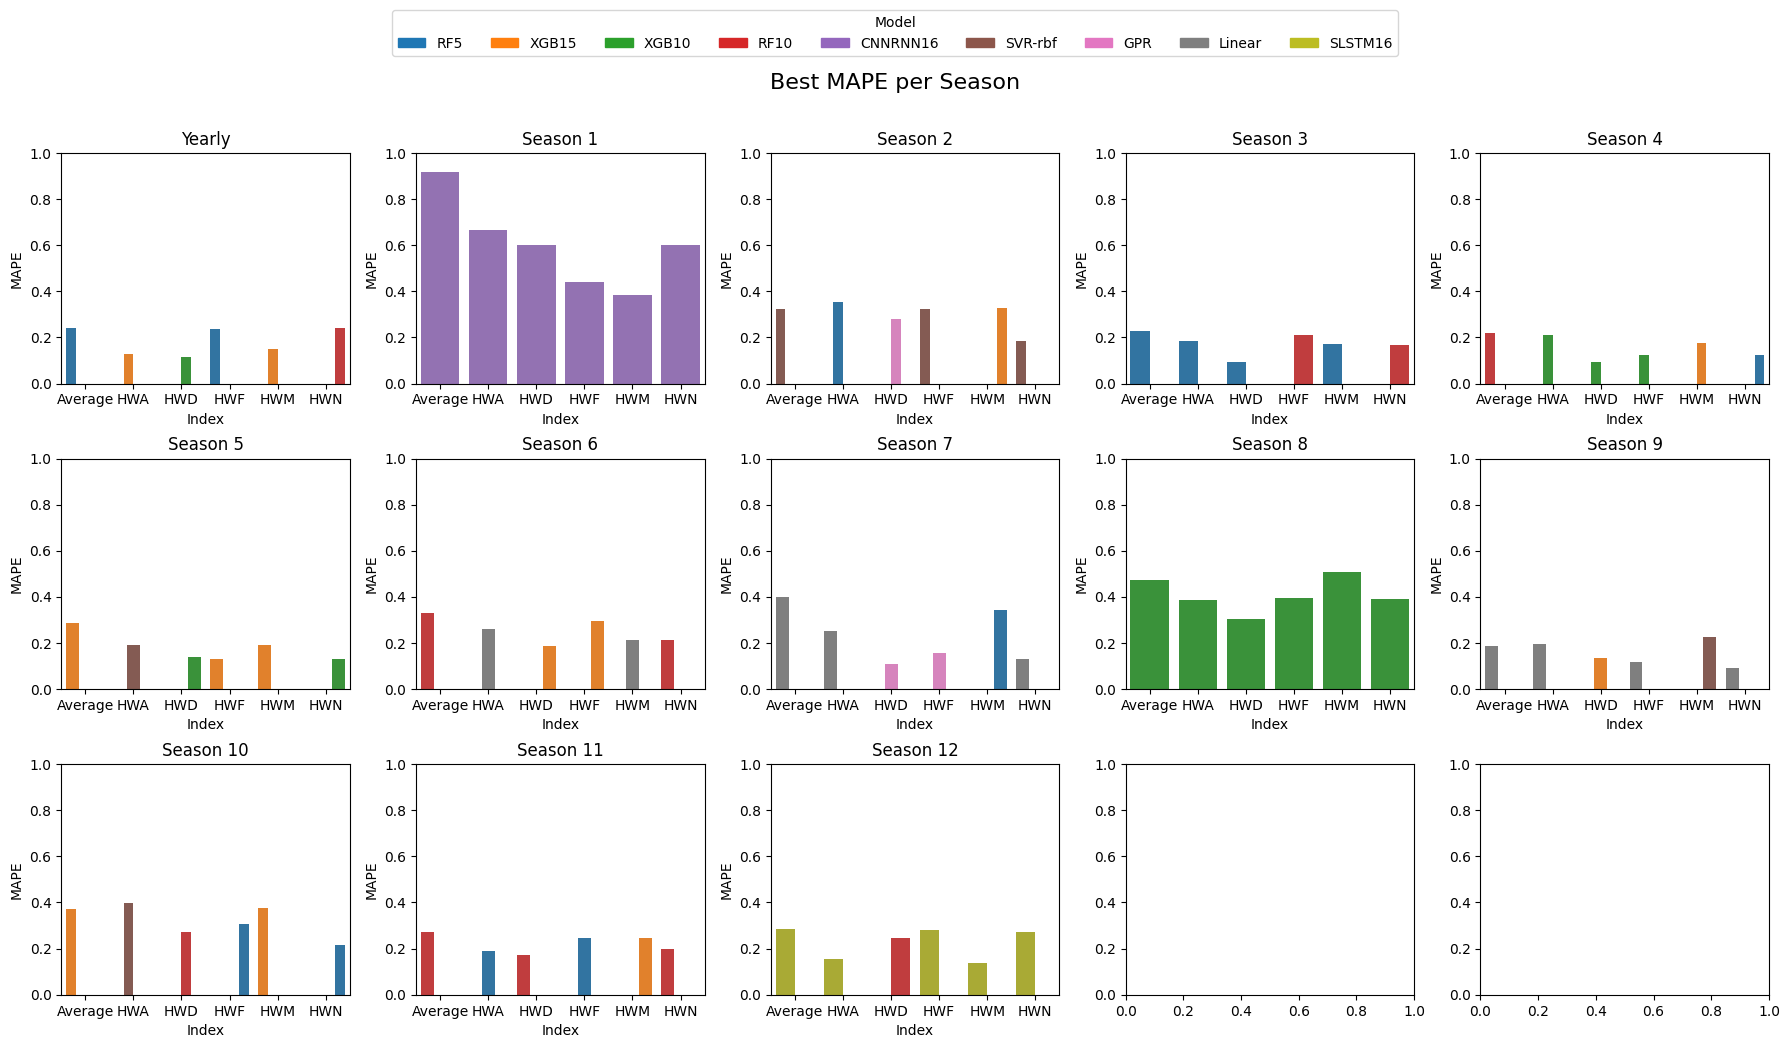

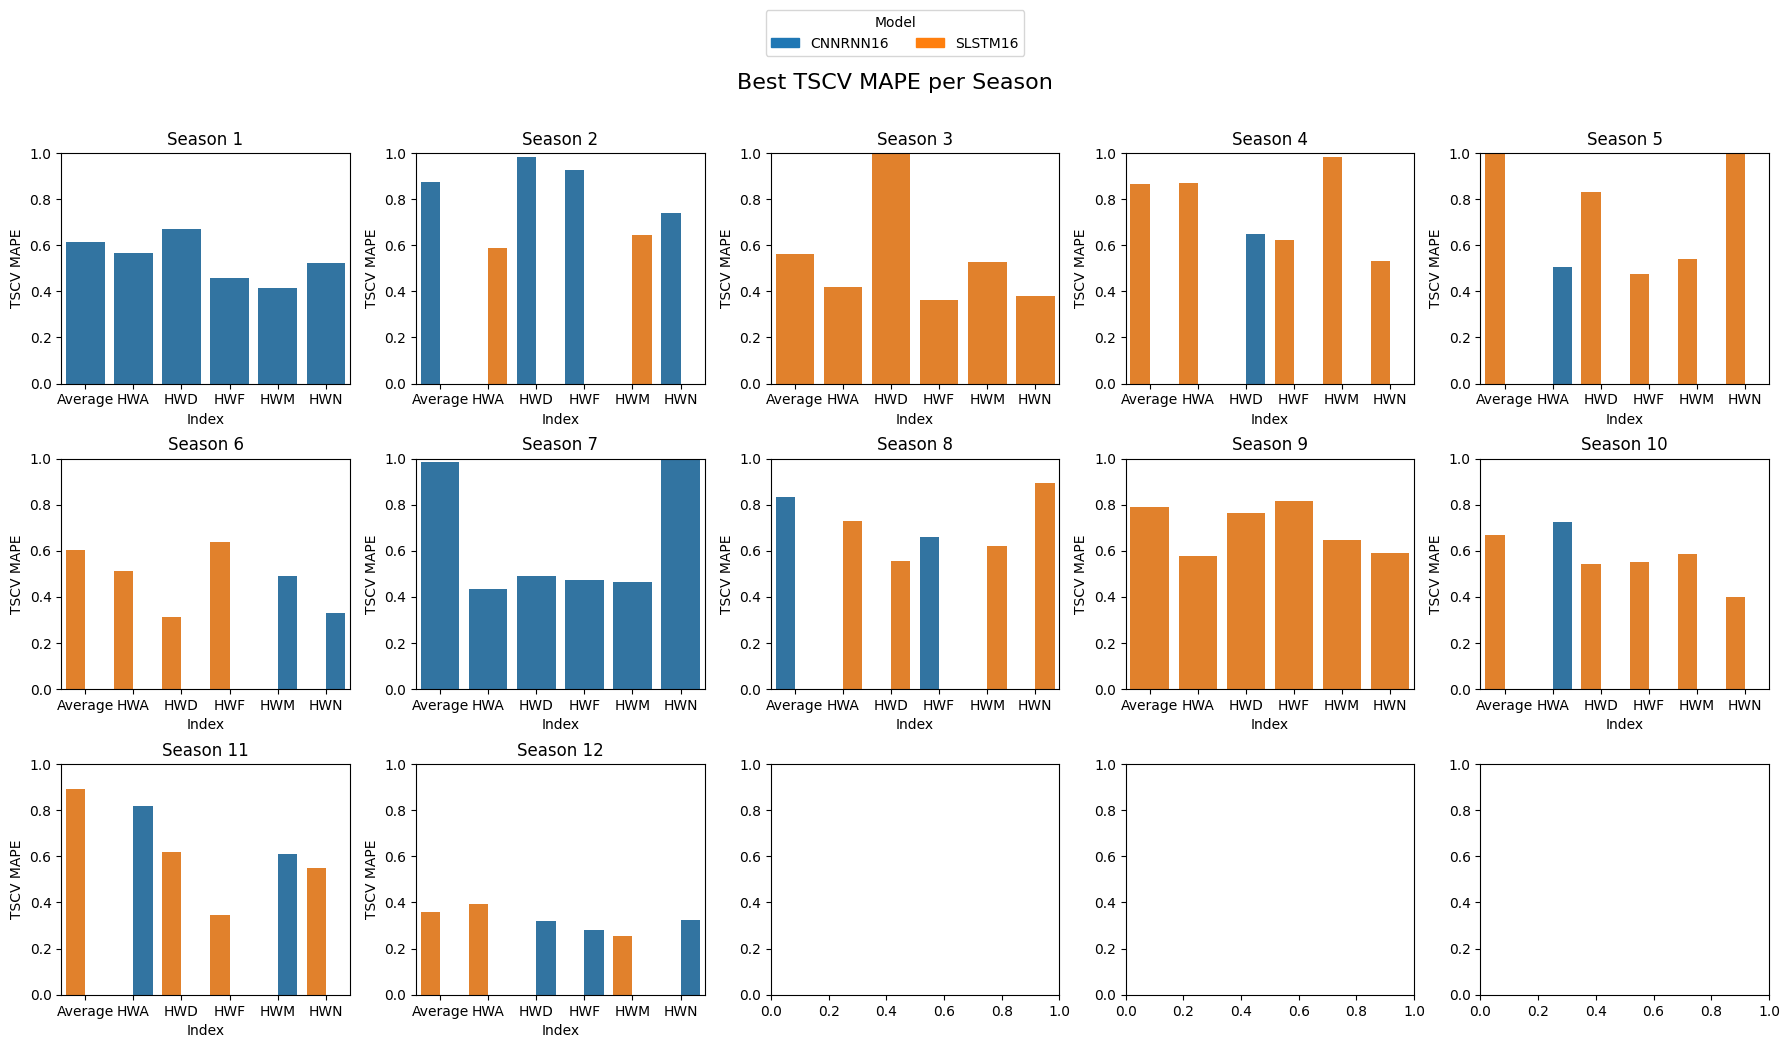

In [26]:
# Plot R2 results
plot_best_results_per_season(r2_seasons, "R²", "prediction", "Best R² per Season")

# Plot CV R2 results
plot_best_results_per_season(tscv_r2_seasons, "TSCV R²", "TSCV","Best TSCV R² per Season")

# Plot MAPE results (invert y-axis since lower is better)
plt.figure(figsize=(18, 10))
plot_best_results_per_season(mape_seasons, "MAPE", "prediction", "Best MAPE per Season")
plot_best_results_per_season(tscv_mape_seasons, "TSCV MAPE", "TSCV", "Best TSCV MAPE per Season")


In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tscv_mape_seasons.sort_values("best_value", ascending=True))

model    index  best_value   id_data                       filename   
4   SLSTM16      HWM    0.254616  8469c02e  predictor_8469c02e_12.parquet  \
3  CNNRNN16      HWF    0.281910  bcf9a033  predictor_bcf9a033_12.parquet   
2   SLSTM16      HWD    0.311368  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
2  CNNRNN16      HWD    0.318449  9c27f2e2  predictor_9c27f2e2_12.parquet   
5  CNNRNN16      HWN    0.323636  acfb270e  predictor_acfb270e_12.parquet   
5  CNNRNN16      HWN    0.328166  b8ee000f   predictor_b8ee000f_6.parquet   
3   SLSTM16      HWF    0.344836  32dff372  predictor_32dff372_11.parquet   
0   SLSTM16  Average    0.357859  2c4eaae6  predictor_2c4eaae6_12.parquet   
3   SLSTM16      HWF    0.362854  f6801988   predictor_f6801988_3.parquet   
5   SLSTM16      HWN    0.379595  a811d3cd   predictor_a811d3cd_3.parquet   
1   SLSTM16      HWA    0.393861  2c4eaae6  predictor_2c4eaae6_12.parquet   
5   SLSTM16      HWN    0.399316  c3ae3c4c  predictor_c3ae3c4c_10.parquet   
4  CNNRNN16      HWM    0.413428  7ec4afcb   predictor_7ec4afcb_1.parquet   
1   SLSTM16      HWA    0.418532  006588db   predictor_006588db_3.parquet   
1  CNNRNN16      HWA    0.434868  c2cf81c9   predictor_c2cf81c9_7.parquet   
3  CNNRNN16      HWF    0.458719  ea3a44e5   predictor_ea3a44e5_1.parquet   
4  CNNRNN16      HWM    0.462815  f0d402c6   predictor_f0d402c6_7.parquet   
3  CNNRNN16      HWF    0.472949  3e628ee6   predictor_3e628ee6_7.parquet   
3   SLSTM16      HWF    0.476883  687e81e5   predictor_687e81e5_5.parquet   
4  CNNRNN16      HWM    0.490397  ae18d668   predictor_ae18d668_6.parquet   
2  CNNRNN16      HWD    0.490795  3e628ee6   predictor_3e628ee6_7.parquet   
1  CNNRNN16      HWA    0.507215  c2cf81c9   predictor_c2cf81c9_5.parquet   
1   SLSTM16      HWA    0.511831  871a6dbd   predictor_871a6dbd_6.parquet   
5  CNNRNN16      HWN    0.523799  bbbf3b64   predictor_bbbf3b64_1.parquet   
4   SLSTM16      HWM    0.529147  c9589884   predictor_c9589884_3.parquet   
5   SLSTM16      HWN    0.529503  0f1dc279   predictor_0f1dc279_4.parquet   
4   SLSTM16      HWM    0.541634  687e81e5   predictor_687e81e5_5.parquet   
2   SLSTM16      HWD    0.542879  eb8a3d21  predictor_eb8a3d21_10.parquet   
3   SLSTM16      HWF    0.549593  b28cc104  predictor_b28cc104_10.parquet   
5   SLSTM16      HWN    0.550932  32dff372  predictor_32dff372_11.parquet   
2   SLSTM16      HWD    0.557321  3135d686   predictor_3135d686_8.parquet   
0   SLSTM16  Average    0.561707  006588db   predictor_006588db_3.parquet   
1  CNNRNN16      HWA    0.564296  bbbf3b64   predictor_bbbf3b64_1.parquet   
1   SLSTM16      HWA    0.576685  fb472cb5   predictor_fb472cb5_9.parquet   
4   SLSTM16      HWM    0.587539  4253e219  predictor_4253e219_10.parquet   
1   SLSTM16      HWA    0.588247  871a6dbd   predictor_871a6dbd_2.parquet   
5   SLSTM16      HWN    0.588413  fb3bad0f   predictor_fb3bad0f_9.parquet   
0   SLSTM16  Average    0.603445  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
4  CNNRNN16      HWM    0.610275  90afcd47  predictor_90afcd47_11.parquet   
0  CNNRNN16  Average    0.615355  bc74a9b1   predictor_bc74a9b1_1.parquet   
2   SLSTM16      HWD    0.619054  32dff372  predictor_32dff372_11.parquet   
3   SLSTM16      HWF    0.620942  8918ff8b   predictor_8918ff8b_4.parquet   
4   SLSTM16      HWM    0.621166  3135d686   predictor_3135d686_8.parquet   
3   SLSTM16      HWF    0.638510  c3ae3c4c   predictor_c3ae3c4c_6.parquet   
4   SLSTM16      HWM    0.644589  b28cc104   predictor_b28cc104_2.parquet   
2  CNNRNN16      HWD    0.647090  42bdf1e2   predictor_42bdf1e2_4.parquet   
4   SLSTM16      HWM    0.649027  5b7690af   predictor_5b7690af_9.parquet   
3  CNNRNN16      HWF    0.659268  915ed15f   predictor_915ed15f_8.parquet   
0   SLSTM16  Average    0.667113  eb8a3d21  predictor_eb8a3d21_10.parquet   
2  CNNRNN16      HWD    0.672156  a93222d6   predictor_a93222d6_1.parquet   
1  CNNRNN16      HWA    0.723439  4bd58a6f  predictor_4bd58a6f_10.parquet   
1 

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


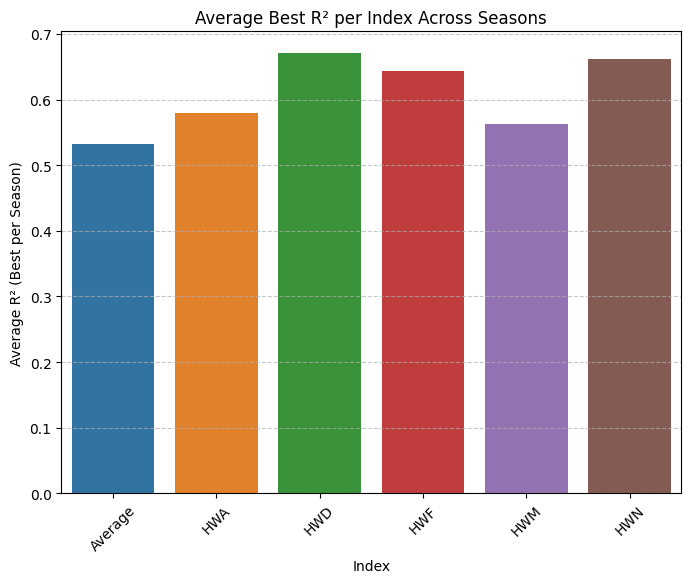

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


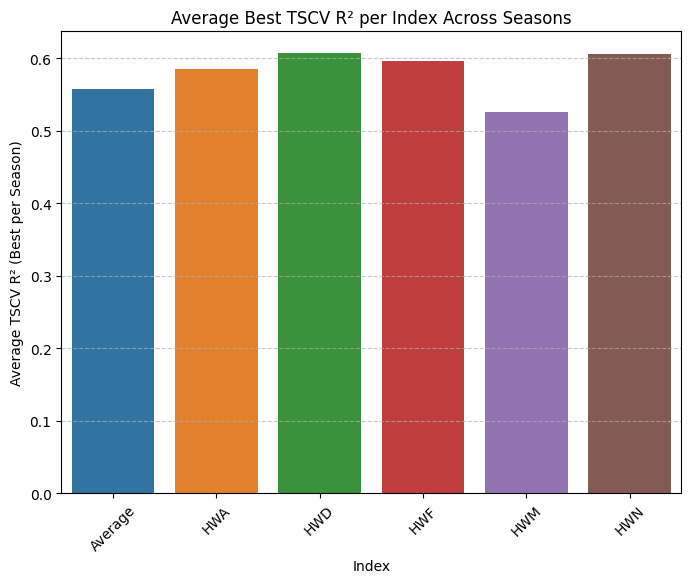

c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_best_results, x="index", y="best_value", palette="tab10")


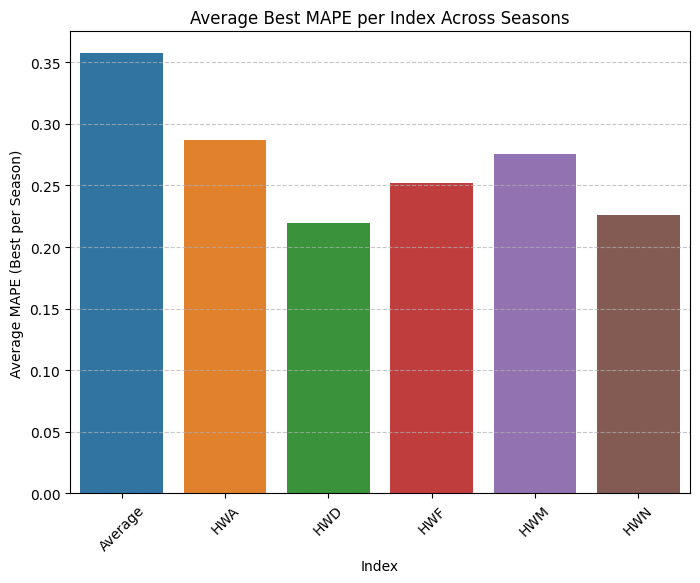

In [28]:
# Example usage
plot_average_best_results(r2_seasons, "R²", "Average Best R² per Index Across Seasons")
plot_average_best_results(tscv_r2_seasons, "TSCV R²", "Average Best TSCV R² per Index Across Seasons")
plot_average_best_results(mape_seasons, "MAPE", "Average Best MAPE per Index Across Seasons")

In [29]:
with open("pcas_1972.pkl", "rb") as inp:
    pcas_sst = pickle.load(inp)
interest_ids = cv_r2_seasons[(cv_r2_seasons["best_value"] >= 0.3)]
df1 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        continue
    else:
        temp = ""
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in row["extra_indices"]:
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
                k+=1
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_sst[id_pca].variables_dict.values())
            box = pcas_sst[id_pca].box
            mode = pcas[i][-1]
            df1.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_sst
display(df1)



id_data id_pca  mode                     box          variables
0   915ed15f   None  None                    None                PDO
1   915ed15f   None  None                    None                ONI
2   915ed15f   None  None                    None                SAM
3   915ed15f    950     3  [247.5, 290, -60, -30]                [Z]
4   915ed15f    959     3  [247.5, 290, -60, -30]            [SP, Z]
5   915ed15f    980     3  [247.5, 290, -60, -30]       [SP, U10, Z]
6   915ed15f    650     3    [205, 247.5, -30, 0]           [V10, Z]
7   915ed15f    964     3  [247.5, 290, -60, -30]           [U10, Z]
8   915ed15f    946     3  [247.5, 290, -60, -30]               [SP]
9   915ed15f    635     3    [205, 247.5, -30, 0]                [Z]
10  915ed15f    670     3    [205, 247.5, -30, 0]      [U10, V10, Z]
11  915ed15f    698     3    [247.5, 290, -30, 0]                [Z]
12  915ed15f   1343     3      [205, 290, -30, 0]           [V10, Z]
13  915ed15f    887     3  [205, 247.5, -60, -30]                [Z]
14  915ed15f    739     3    [247.5, 290, -30, 0]  [SST, SP, V10, Z]
15  915ed15f    648     2    [205, 247.5, -30, 0]         [U10, V10]
16  915ed15f    649     3    [205, 247.5, -30, 0]           [U10, Z]
17  915ed15f    832     2  [162.5, 205, -60, -30]          [SP, V10]
18  915ed15f    667     3    [205, 247.5, -30, 0]    [TTR, U10, V10]
19  915ed15f    851     3  [162.5, 205, -60, -30]     [SP, TTR, V10]
20  915ed15f    716     3    [247.5, 290, -30, 0]     [SST, SP, V10]
21  915ed15f    684     3    [205, 247.5, -30, 0]  [SP, U10, V10, Z]
22  915ed15f   1341     2      [205, 290, -30, 0]         [U10, V10]

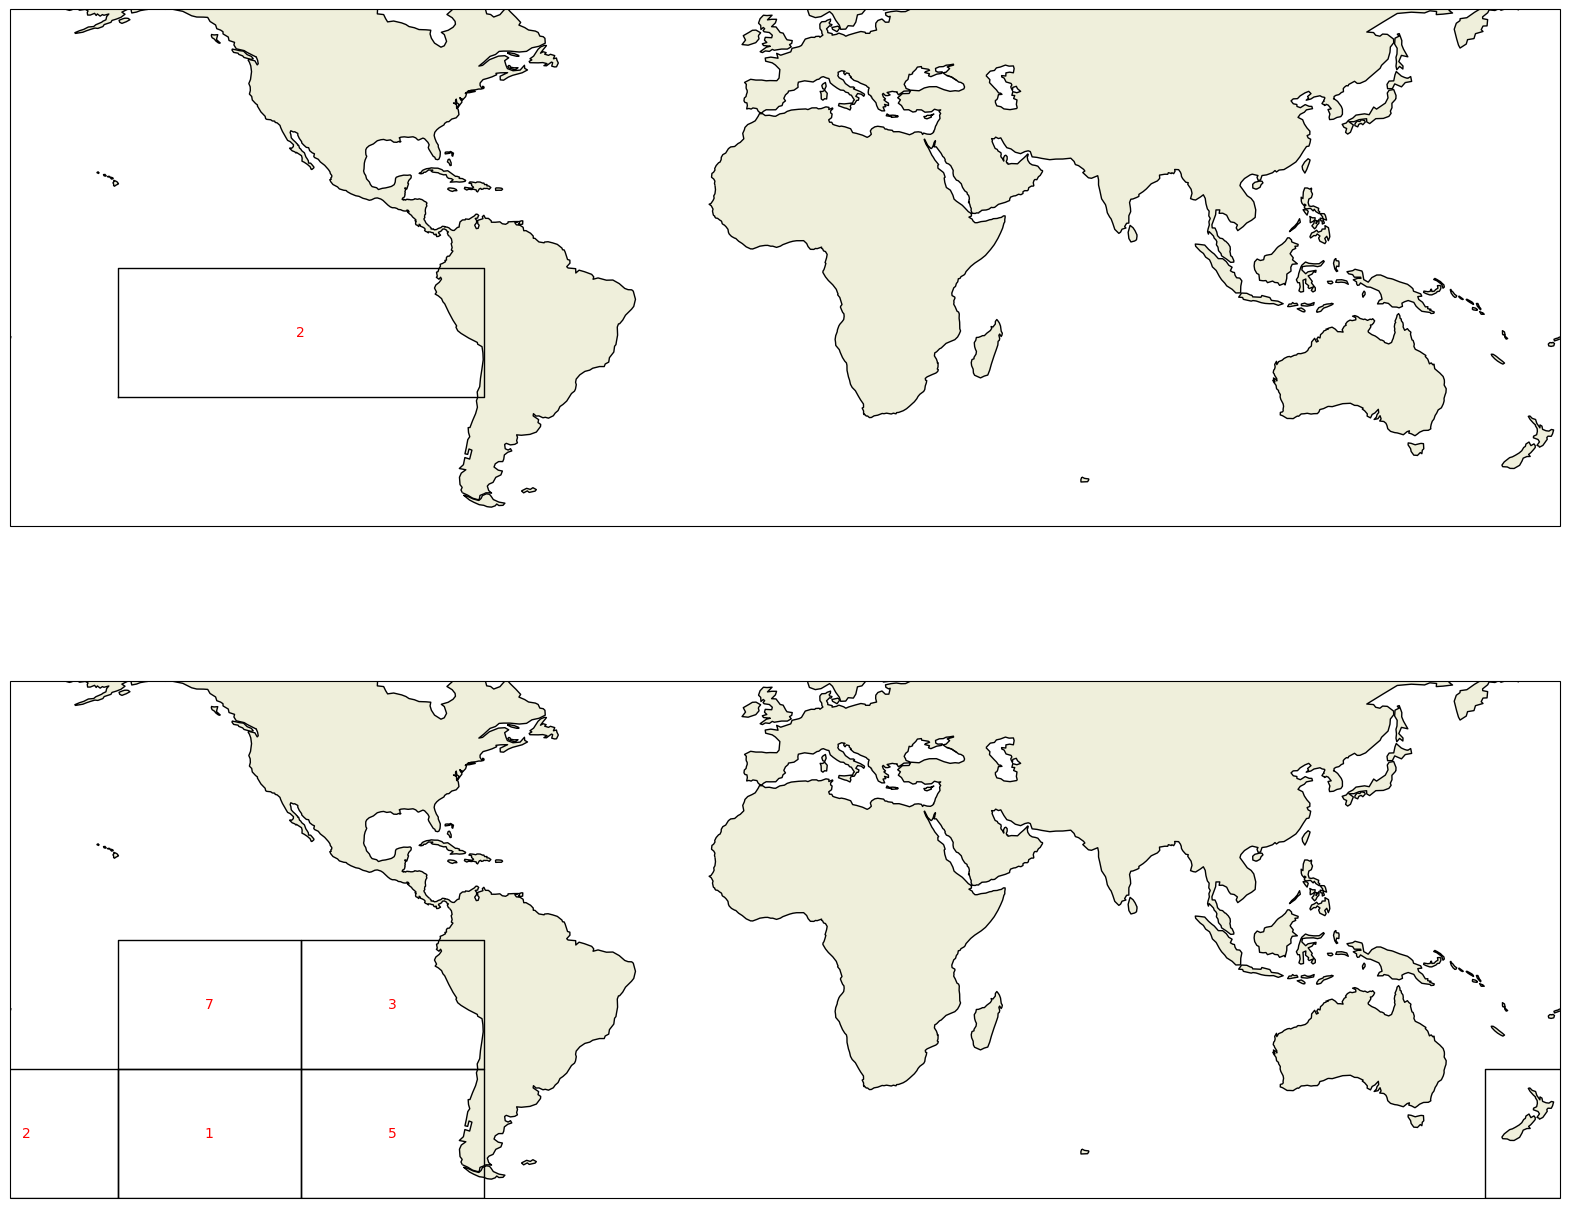

In [30]:
plot_grid_count(df1)

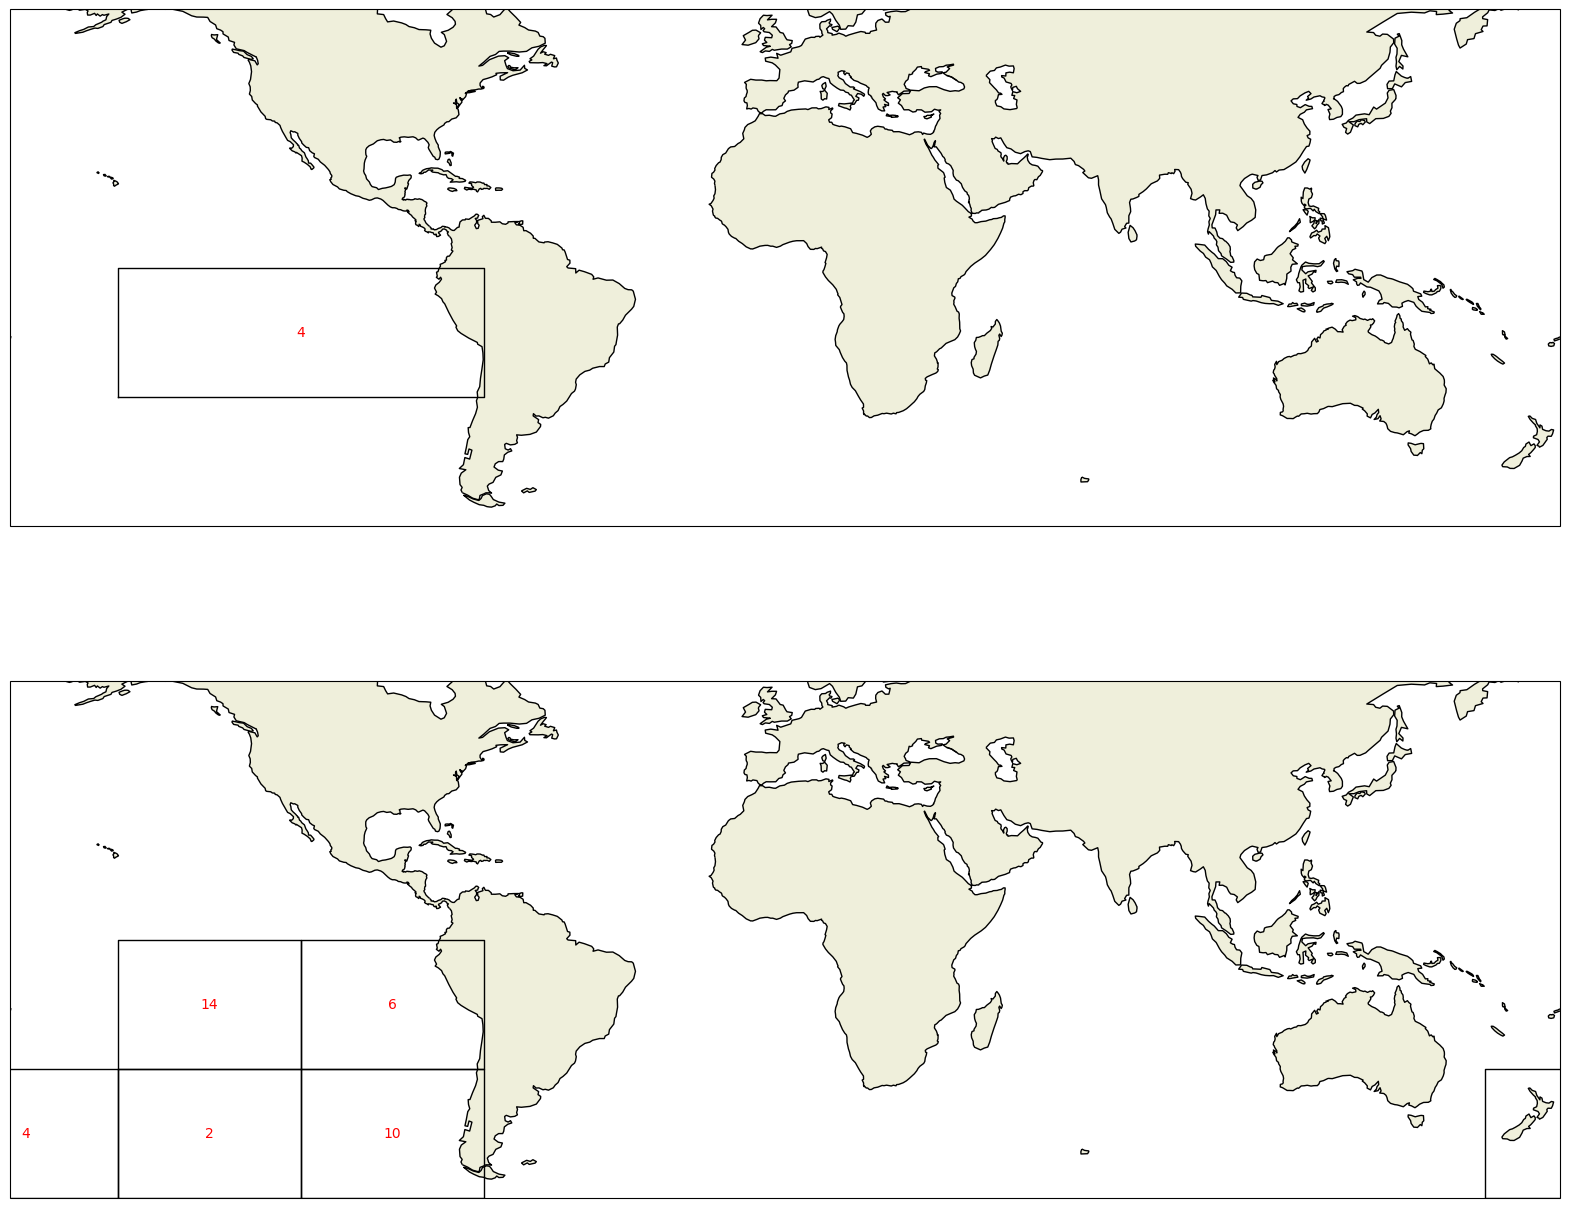

In [ ]:
# plot_grid_count(df1) old

In [31]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
interest_ids = tscv_r2_seasons[(tscv_r2_seasons["best_value"] >= 0.7)]

for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["only_sea"] == False:
        temp = "_t2m"
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        if "PDO" not in str(row["extra_indices"]):
            pcas = list(data_file.columns[5:])
        else:
            pcas = list(data_file.columns[5:-3])
            for index in list(data_file.columns[-3:]):
                df1.loc[k] = [id, None, None, None, index]
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                     box               variables
0    7ec4afcb     962    1  [247.5, 290, -60, -30]              [U10, T2M]
1    7ec4afcb     955    1  [247.5, 290, -60, -30]               [SP, T2M]
2    7ec4afcb     965    1  [247.5, 290, -60, -30]                [Z, T2M]
3    7ec4afcb     984    1  [247.5, 290, -60, -30]           [U10, Z, T2M]
4    7ec4afcb     972    1  [247.5, 290, -60, -30]          [SP, U10, T2M]
..        ...     ...  ...                     ...                     ...
220  82de8d97     931    3  [205, 247.5, -60, -30]       [SP, U10, Z, T2M]
221  82de8d97     700    2    [247.5, 290, -30, 0]               [SP, U10]
222  82de8d97     921    3  [205, 247.5, -60, -30]           [U10, Z, T2M]
223  82de8d97     847    3  [162.5, 205, -60, -30]            [SP, V10, Z]
224  82de8d97     942    3  [205, 247.5, -60, -30]  [SP, U10, V10, Z, T2M]

[225 rows x 5 columns]

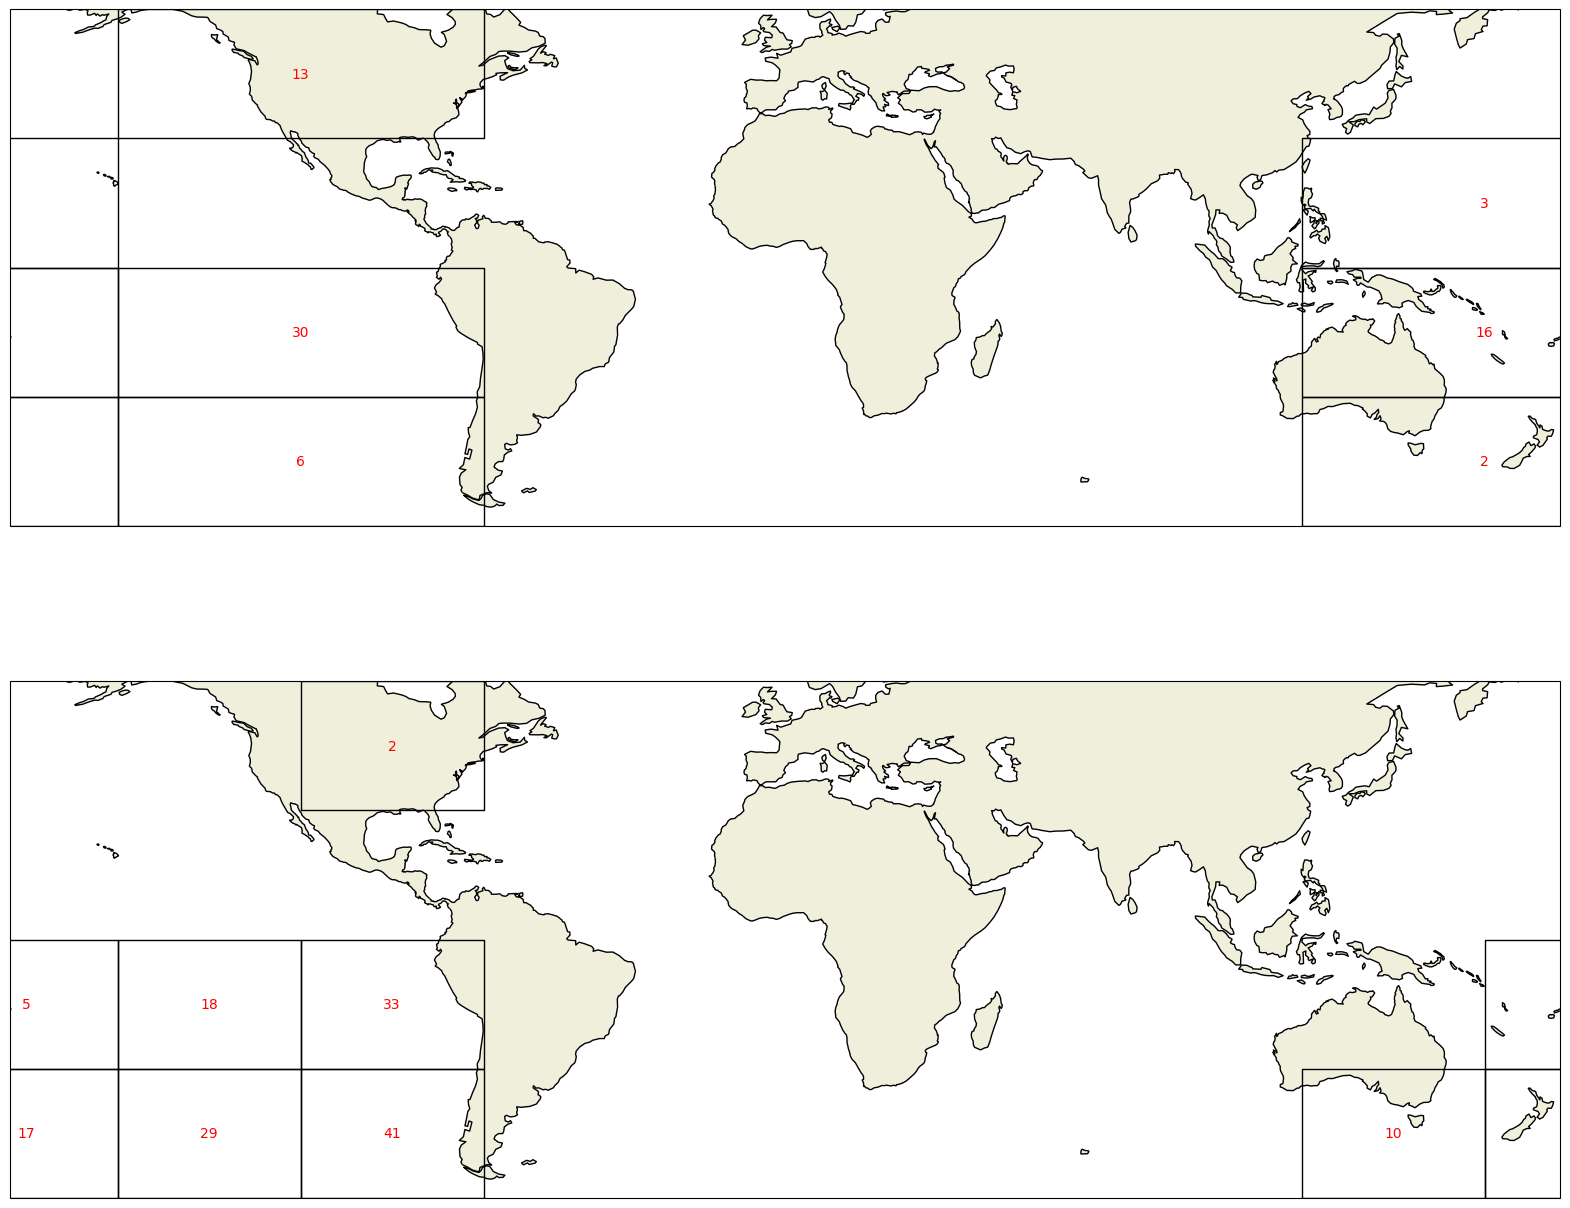

In [32]:
plot_grid_count(df2)

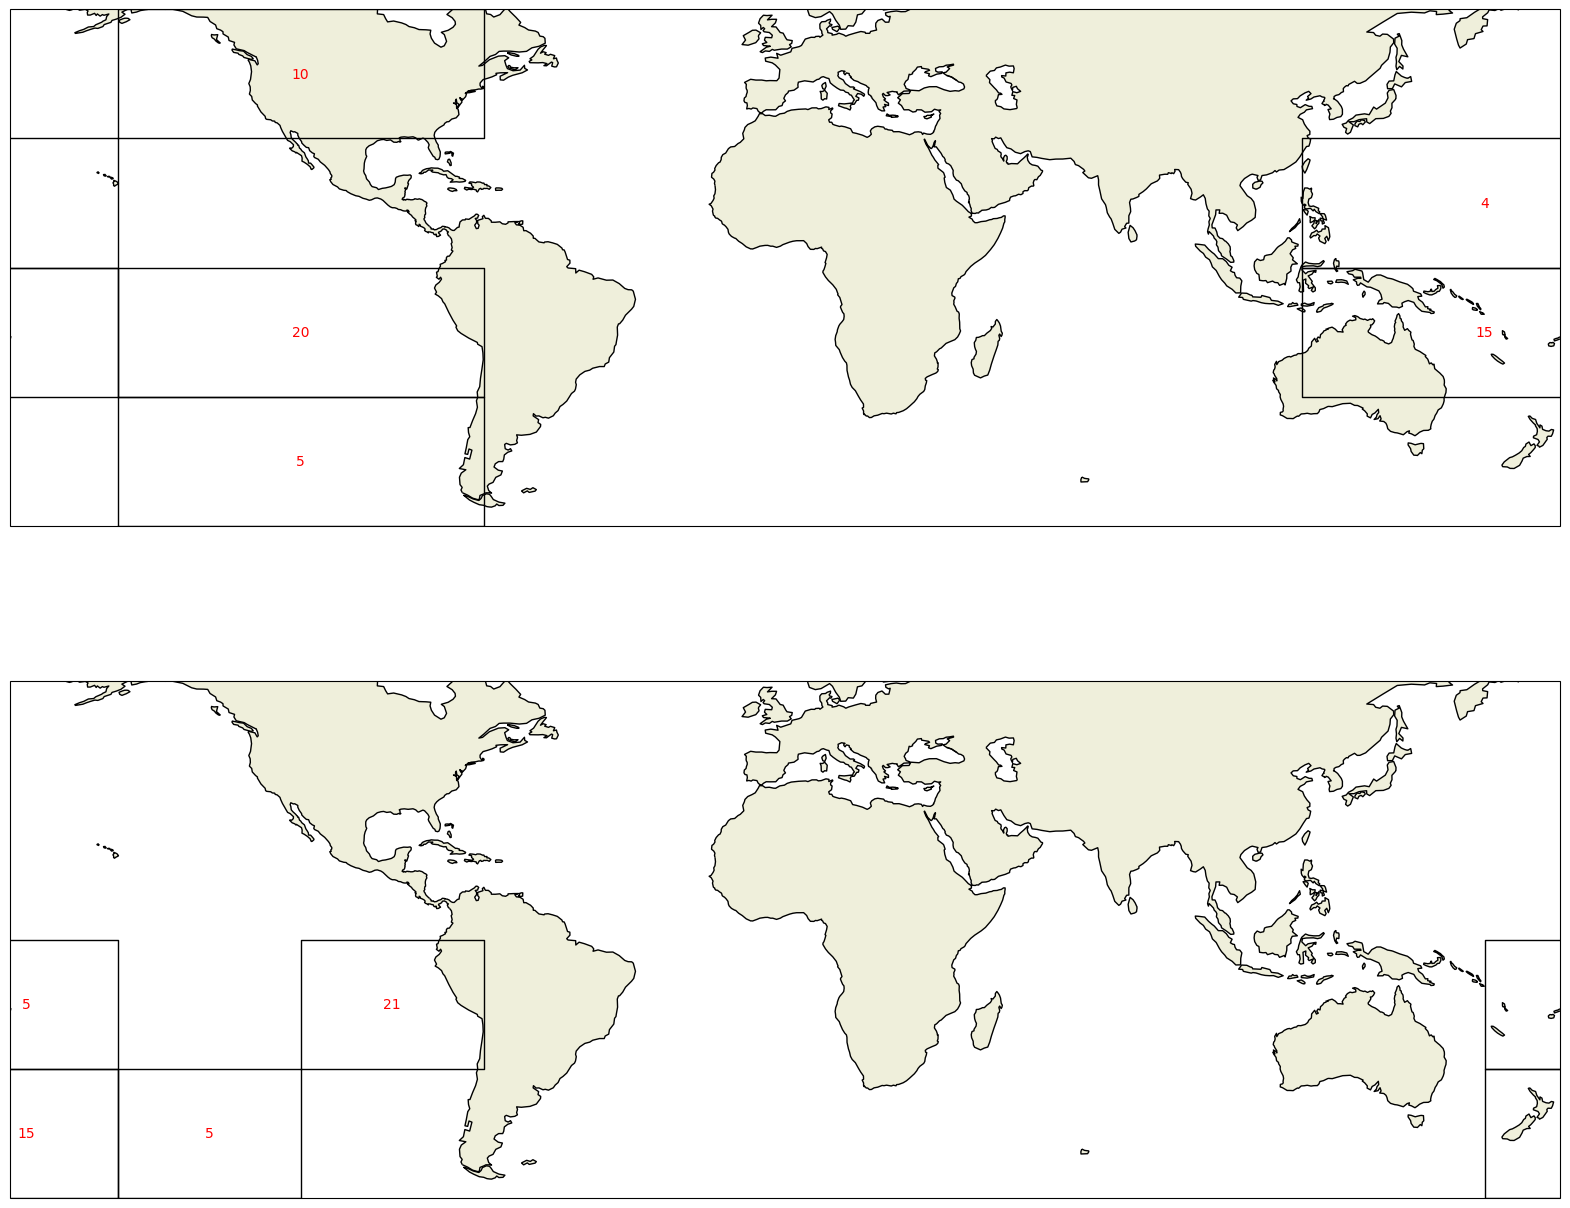

In [ ]:
# plot_grid_count(df2) old

### OLD RESULTS

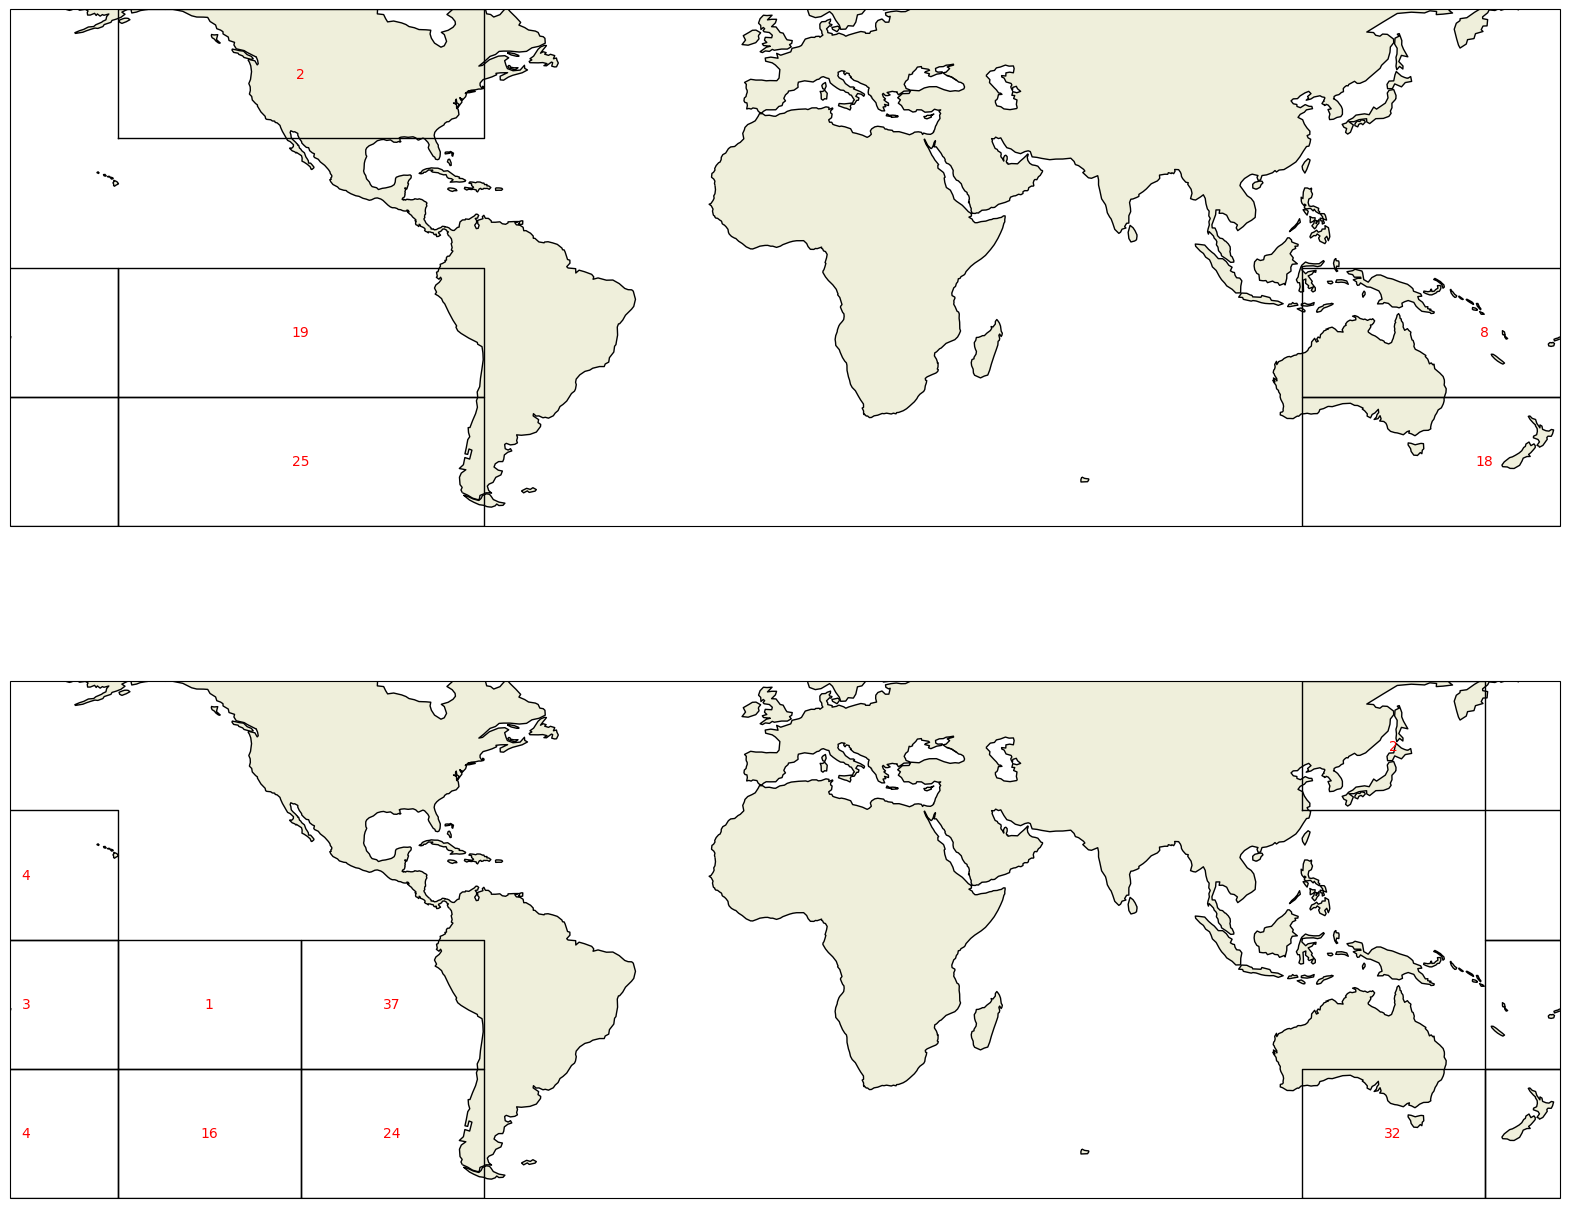

In [ ]:
plot_grid_count(df1)

In [ ]:
with open("pcas_t2m.pkl", "rb") as inp:
    pcas_t2m = pickle.load(inp)
df2 = pd.DataFrame(columns=["id_data", "id_pca", "mode", "box", "variables"])
k=0
for index, row in interest_ids.iterrows():
    id = row["id_data"]
    season = row["season"]
    if row["var_temp"] == "t2m":
        temp = "_t2m"
        with open("pcas_t2m.pkl", "rb") as inp:
            pcas_t2m = pickle.load(inp)
        data_file = pd.read_parquet(f"data/new_features{temp}/{region}/predictor_{id}_{season}.parquet")
        pcas = list(data_file.columns[5:])
        for i in range(len(pcas)):
            id_pca = int(re.search(r'PC_(.*?)-Mode-', pcas[i]).group(1))
            vars = list(pcas_t2m[id_pca].variables_dict.values())
            box = pcas_t2m[id_pca].box
            mode = pcas[i][-1]
            df2.loc[k] = [id, id_pca, mode, box, vars]
            k+=1
del pcas_t2m
display(df2)

id_data  id_pca mode                     box       variables
0   76c7ef4c     965    2  [247.5, 290, -60, -30]        [Z, T2M]
1   76c7ef4c     885    1  [205, 247.5, -60, -30]           [V10]
2   76c7ef4c     766    1  [120, 162.5, -60, -30]       [SP, T2M]
3   76c7ef4c     780    2  [120, 162.5, -60, -30]  [SP, TTR, T2M]
4   76c7ef4c     887    2  [205, 247.5, -60, -30]           [T2M]
5   6b480627     965    2  [247.5, 290, -60, -30]        [Z, T2M]
6   6b480627     885    1  [205, 247.5, -60, -30]           [V10]
7   6b480627     766    1  [120, 162.5, -60, -30]       [SP, T2M]
8   6b480627     780    2  [120, 162.5, -60, -30]  [SP, TTR, T2M]
9   6b480627     887    2  [205, 247.5, -60, -30]           [T2M]
10  e75778a3    1360    1      [205, 290, -30, 0]   [U10, V10, Z]
11  e75778a3    1338    1      [205, 290, -30, 0]      [U10, V10]
12  e75778a3    1339    2      [205, 290, -30, 0]        [U10, Z]
13  e75778a3     730    1    [247.5, 290, -30, 0]   [U10, V10, Z]
14  e75778a3    1275    2      [120, 205, -30, 0]      [U10, V10]
15  e75778a3    1325    1      [205, 290, -30, 0]           [U10]
16  e75778a3     708    1    [247.5, 290, -30, 0]      [U10, V10]
17  e75778a3     571    2    [162.5, 205, -30, 0]             [Z]
18  e75778a3     839    2  [162.5, 205, -60, -30]        [Z, T2M]
19  e75778a3    1097    1      [205, 290, 30, 60]    [SP, U10, Z]
20  fc43815b    1360    1      [205, 290, -30, 0]   [U10, V10, Z]
21  fc43815b    1338    1      [205, 290, -30, 0]      [U10, V10]
22  fc43815b    1339    2      [205, 290, -30, 0]        [U10, Z]
23  fc43815b     730    1    [247.5, 290, -30, 0]   [U10, V10, Z]
24  fc43815b    1275    2      [120, 205, -30, 0]      [U10, V10]
25  fc43815b    1325    1      [205, 290, -30, 0]           [U10]
26  fc43815b     708    1    [247.5, 290, -30, 0]      [U10, V10]
27  fc43815b     571    2    [162.5, 205, -30, 0]             [Z]
28  fc43815b     839    2  [162.5, 205, -60, -30]        [Z, T2M]
29  fc43815b    1097    1      [205, 290, 30, 60]    [SP, U10, Z]

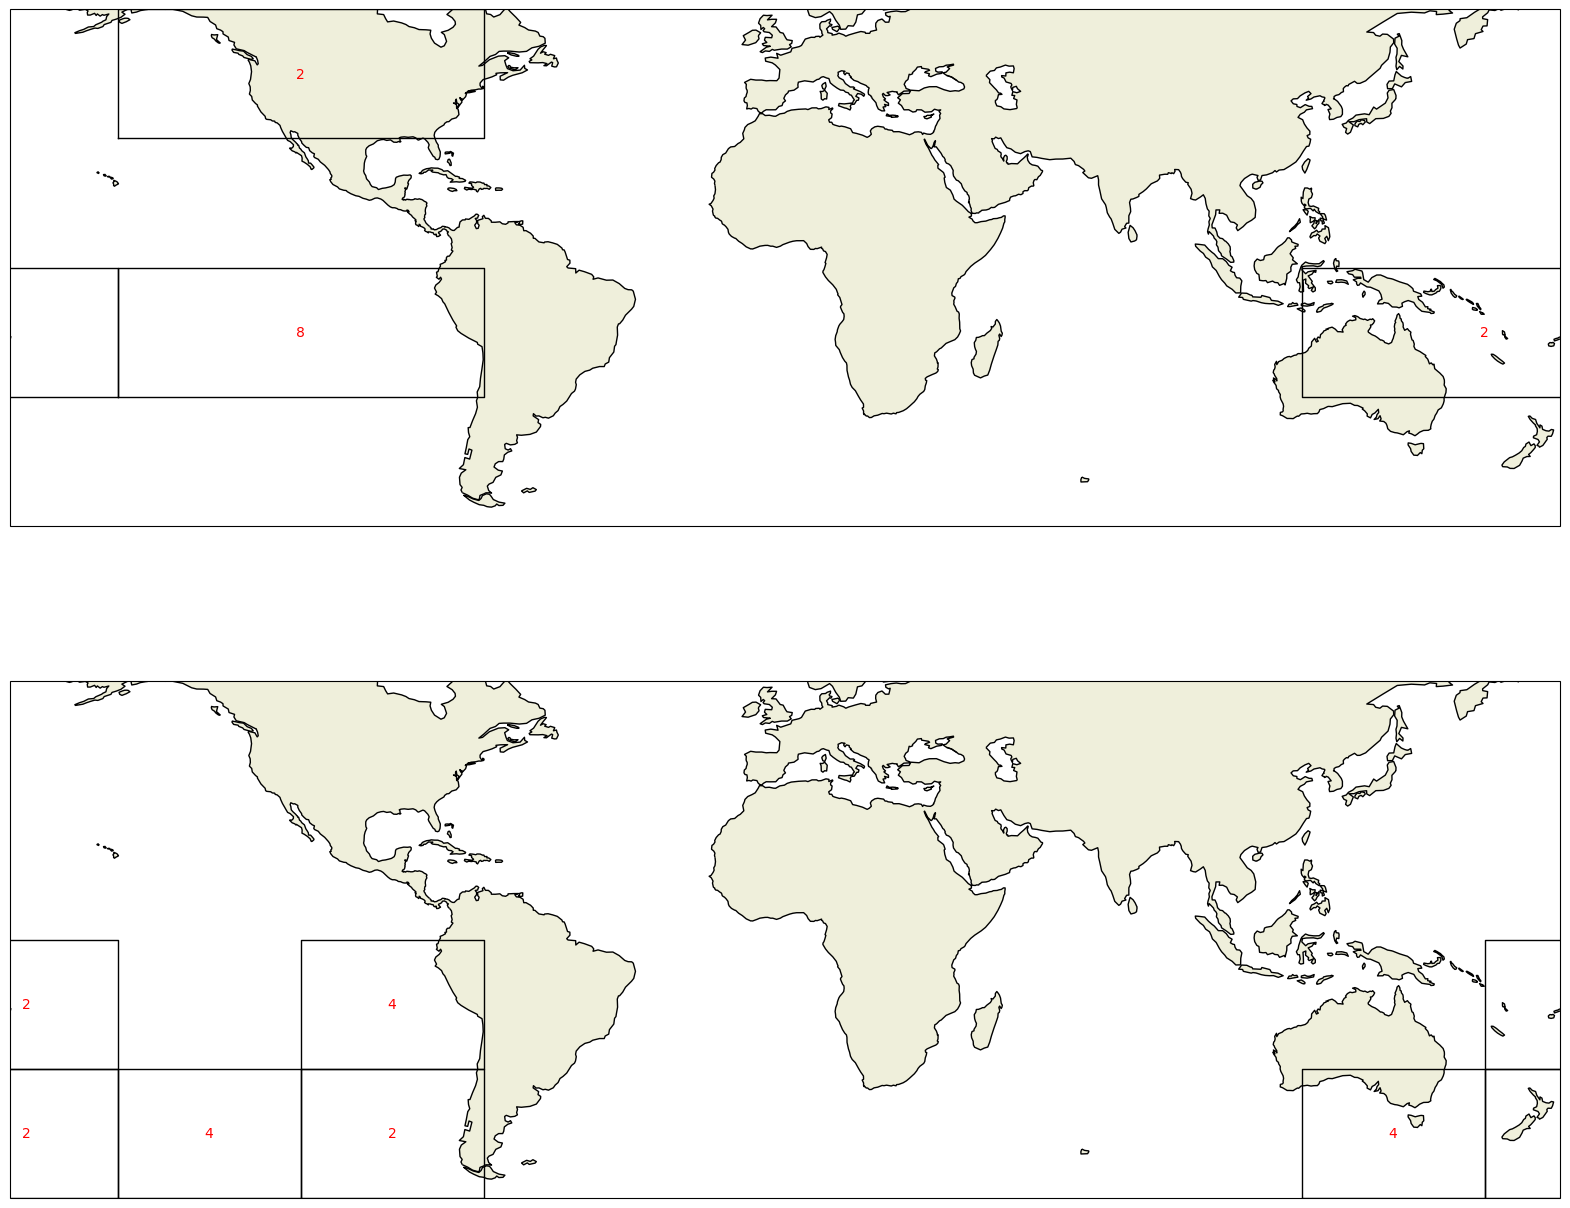

In [ ]:
plot_grid_count(df2)